# Capstone Project Modul 3

## Business Understanding

**Konteks**

Di suatu perusahaan E-commerce, pemahaman yang mendalam tentang perilaku pelanggan sangat penting untuk kesuksesan jangka panjang. Pergantian pelanggan atau churn merupakan salah satu masalah utama yang dihadapi perusahaan dalam menjaga keberlanjutan dan pertumbuhan bisnis mereka. Oleh karena itu, penting untuk memiliki pemahaman yang baik tentang dinamika yang mempengaruhi tingkat pergantian pelanggan serta langkah-langkah yang dapat diambil untuk mengurangi risiko pergantian tersebut.

**Problem Statement**

Perusahaan menghadapi tantangan dalam mengidentifikasi dan memprediksi potensi pergantian pelanggan (Customer Churn). Dengan mempertimbangkan beberapa variabel seperti jarak antara gudang perusahaan dengan alamat pelanggan, jumlah perangkat yang terdaftar oleh pelanggan, kategori pesanan yang disukai pelanggan, skor kepuasan pelanggan, dan beberapa variabel lainnya. 

Dengan memahami variabel-variabel ini, maka divisi analisis data ditugaskan untuk mengembangkan model prediksi yang dapat mengklasifikasikan pelanggan sebagai "Churn" atau "Non-Churn" dengan tingkat akurasi yang tinggi. Dengan demikian, perusahaan dapat mengambil tindakan pencegahan yang sesuai untuk mempertahankan pelanggan yang rentan beralih dan meningkatkan retensi pelanggan secara keseluruhan.

Masalah ini penting karena pengaruhnya terhadap kesehatan keuangan perusahaan dan pertumbuhan jangka panjangnya. Tingkat pergantian pelanggan yang tinggi menandakan bahwa ada ketidakpuasan atau kebutuhan yang tidak terpenuhi yang perlu ditangani oleh perusahaan. Dengan mempertahankan pelanggan yang ada, perusahaan dapat menghemat biaya pemasaran dan akuisisi pelanggan baru, sambil memperkuat basis pelanggan yang sudah ada.

**Tujuan**

Maka berdasarkan context dan permasalahan tersebut, perusahaan membutuhkan kemampuan memprediksi kemungkinan pelanggan yang dapat churn dikemudian hari. Hal tersebut bertujuan agar pendapatan perusahaan tidak akan berkurang dikemudian hari kare terjadinya Customer Churn.

Selain itu, perusahaan juga ingin mengetahui faktor dan variabel apa saja yang menyebabkan terjadinya Customer Churn. Dengan mengetahui hal tersebut perusahaan dapat membuat rencana yang lebih baik untuk mendekati pelanggan agar tetap loyal terhadap layanan yang diberikan oleh perusahaan.


# Data Understanding

In [1]:
#Panggil file
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

dataset = "D:/SELGI/Purwadika/capstone 3/data_ecommerce_customer_churn.csv"
churn = pd.read_csv(dataset)

print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB
None


Data tersebut merupakan data yang menggambarkan profil pelanggan yang akan churn dari perusahaan retail online (E-commerce). Berikut adalah variabel-variabel yang terdapat dalam dataset.

* **Tenure** : masa jabatan pelanggan
* **WarehouseToHome** : gudang ke rumah pelanggan
* **NumberOfDeviceRegistered** : jumlah perangkat yang terdaftar
* **PreferedOrderCat** : kategori pesanan pilihan pelanggan dalam sebulan terakhir
* **SatisfactionScore** : skor kepuasan
* **MaritalStatus** : status pernikahan
* **NumberOfAddress** : nomor alamat
* **Complain** : komplain
* **DaySinceLastOrder** : hari sejak pesanan terakhir
* **CashbackAmount** : jumlah uang kembalian
* **Churn** : churn

Data yang dimiliki mencakup berbagai variabel yang berkaitan dengan perilaku dan karakteristik pelanggan. Setiap baris dalam dataset mewakili informasi tentang satu pelanggan, sementara setiap kolom merepresentasikan atribut atau fitur tertentu yang dapat digunakan untuk memprediksi tingkat churn pelanggan. Variabel-variabel seperti tenure, preferensi pesanan, skor kepuasan, dan jumlah keluhan dapat memberikan wawasan yang berharga tentang faktor-faktor yang mempengaruhi keputusan pelanggan untuk beralih. Dengan memahami data ini, kita dapat mengembangkan model prediksi yang tepat untuk mengidentifikasi pelanggan yang berisiko beralih dan mengambil tindakan yang sesuai untuk mempertahankan mereka.

Berikut adalah lima baris pertama dan terakhir dari dataset

In [2]:
churn

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


# Tahapan Data Understanding and Cleansing

Sebelum melakukan tahapan analisis data, perlu dilakukan pemahaman dataset secara mendalam, serta identifikasi dataset yang mengalami missing value, sehingga perlu dilakukan perbaikan pada dataset. Setiap langkah yang diambil untuk mengatasi terjadinya missing value akan didukung oleh penjelasan secara empiris dan kuat, serta pendekatan analisis statistik.
Pada tahap ini ada beberapa hal yang akan kita lakukan yakni:
1. menampilkan informasi yang ada di dataset berupa jumlah kolom, jumlah baris dan datatype dari dataset tersebut.
2. melihat pada datset apakah ada data yang kosong (null/NaN), jika ada maka akan kita atasi bergantung pada kondisi data tersebut.
3. melihat dekripsi dari dataset yang kita miliki (nilai yang paling sering muncul, standard deviasi, mean, median, dll)
4. Melihat apakah data ada indikasi imbalace atau tidak
5. melihat pada dataset apakah ada outlier
6. Predictor Feature yaitu melihat variabel-variabel mana yang dapat menjadi variabel prediktor yang baik. Hal ini dapat dilakukan dengan beberapa cara yaitu:  
   a. Melakukan analisis univariate untuk setiap fitur, seperti distribusi box plot untuk melihat perbedaan antara grup Churn dan Non-Churn. Fitur-fitur yang menunjukkan perbedaan yang signifikan antara kedua grup ini dapat menjadi prediktor yang baik.  
   b. Menghitung korelasi antara setiap fitur numerik dan variabel target. Fitur-fitur dengan korelasi yang tinggi secara positif atau negatif dengan variabel target cenderung menjadi prediktor yang baik.

In [3]:
print(f'Jumlah baris dan kolom di dataset e-commerce churn adalah {churn.shape}')
churn.info()

Jumlah baris dan kolom di dataset e-commerce churn adalah (3941, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Dataset churn terdiri dari 3941 baris dan 11 kolom. Dataset ini memuat berbagai informasi.Terdapat beberapa kolom dengan jumlah data yang tidak lengkap, seperti kolom **Tenure** yang memiliki 3747 entri non-null, kolom **WarehouseToHome** yang memiliki 3772 entri non-null, dan kolom **DaySinceLastOrder** yang memiliki 3728 entri non-null,

In [4]:
np.sum(churn.isnull())

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

194 data pada variabel **Tenure**, 169 data pada variabel **WarehouseToHome**, dan 213 data pada variabel **DaySinceLastOrder** akan dilakukan imputasi. Dikarenakan ketiga variabel bersifat kontinu, maka digunakan mean atau median sebagai teknik imputasi. Untuk menentukan metode imputasi yang tepat, maka dilakukan identifikasi distribusi datanya. Jika distribusi dari data tersebut normal, maka digunakan mean, namun jika distribusi dari data tersebut tidak normal, maka digunakan median.

In [5]:
#Uji Normalitas

from scipy.stats import shapiro

# Melakukan uji Shapiro-Wilk untuk kolom 'Tenure'
stat, p = shapiro(churn['Tenure'])

# Menampilkan hasil uji normalitas
alpha = 0.05
if p > alpha:
    print("Data 'Tenure' terdistribusi normal (tidak dapat menolak H0)")
else:
    print("Data 'Tenure' tidak terdistribusi normal (menolak H0)")
    
# Melakukan uji Shapiro-Wilk untuk kolom 'WarehouseToHome'
stat, p = shapiro(churn['WarehouseToHome'])

# Menampilkan hasil uji normalitas
alpha = 0.05
if p > alpha:
    print("Data 'WarehouseToHome' terdistribusi normal (tidak dapat menolak H0)")
else:
    print("Data 'WarehouseToHome' tidak terdistribusi normal (menolak H0)")
    
    
# Melakukan uji Shapiro-Wilk untuk kolom 'DaySinceLastOrder'
stat, p = shapiro(churn['DaySinceLastOrder'])

# Menampilkan hasil uji normalitas
alpha = 0.05
if p > alpha:
    print("Data 'DaySinceLastOrder' terdistribusi normal (tidak dapat menolak H0)")
else:
    print("Data 'DaySinceLastOrder' tidak terdistribusi normal (menolak H0)")    

Data 'Tenure' terdistribusi normal (tidak dapat menolak H0)
Data 'WarehouseToHome' terdistribusi normal (tidak dapat menolak H0)
Data 'DaySinceLastOrder' terdistribusi normal (tidak dapat menolak H0)


Karena variabel **Tenure**, **WarehouseToHome** dan **DaySinceLastOrder** berdistribusi normal, maka dapat dilakukan imputasi dengan mean

In [6]:
#Imputasi dengan Mean
churn['Tenure']=churn['Tenure'].fillna(churn['Tenure'].mean())
churn['WarehouseToHome']=churn['WarehouseToHome'].fillna(churn['WarehouseToHome'].mean())
churn['DaySinceLastOrder']=churn['DaySinceLastOrder'].fillna(churn['DaySinceLastOrder'].mean())

np.sum(churn.isnull())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Setelah melakukan tahapan imputasi untuk missing value pada variabel **Tenure**, **WarehouseToHome** dan **DaySinceLastOrder**, maka dapat dilihat bahwasannya semua missing value telah terisi.

Selanjutnya dilakukan identifikasi deskripsi serta isi unik dari setiap variabel

In [7]:
display(churn.describe(), churn.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.286987,8.269040,1.013938,1.381832,2.626699,0.450232,3.567132,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,4.000000,163.340000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [8]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in churn.columns :
    listItem.append( [col, churn[col].nunique(), churn[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,37,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, 10.081398452095009, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,34,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, 15.650583244962885, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,23,"[7.0, 4.531652360515022, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


Dari analisis tersebut menunjukkan bahwa rata-rata tenure pelanggan adalah sekitar 10.08 bulan dengan variasi yang signifikan, sementara rata-rata jarak antara gudang dan rumah pelanggan adalah sekitar 15.65 km. Pelanggan rata-rata terdaftar untuk menggunakan sekitar 3.68 perangkat, dengan mayoritas memiliki 3 atau 4 perangkat. Skor kepuasan rata-rata adalah sekitar 3.09, menunjukkan kepuasan sedang. Sekitar 28% dari pelanggan mengajukan keluhan dalam satu bulan terakhir. Selain itu, rata-rata jumlah hari sejak pesanan terakhir adalah sekitar 4.53 hari, dengan rata-rata cashback sebesar $176.71. Kategori pesanan pilihan terbanyak adalah Laptop & Aksesoris, dan mayoritas pelanggan adalah yang sudah menikah

### Pengecekan Outlier 

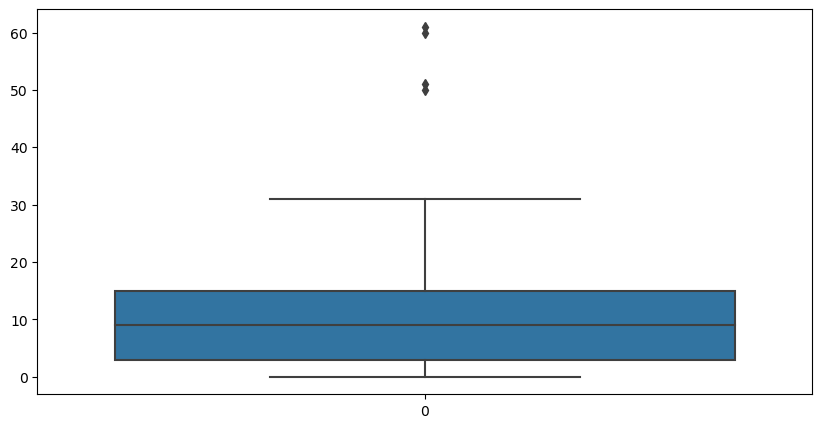

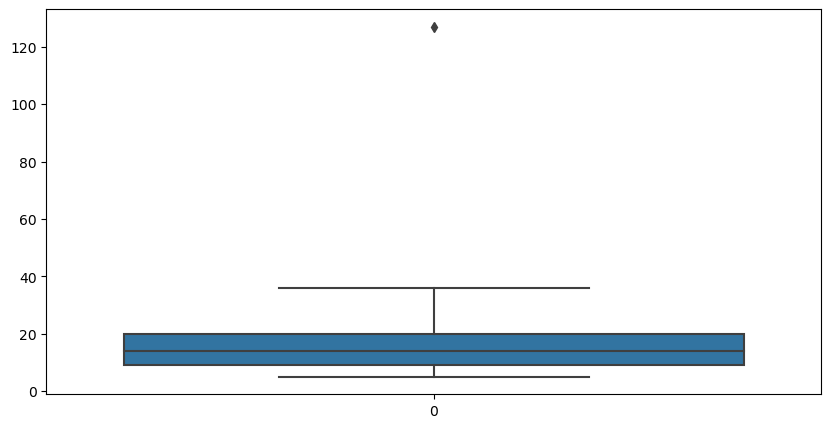

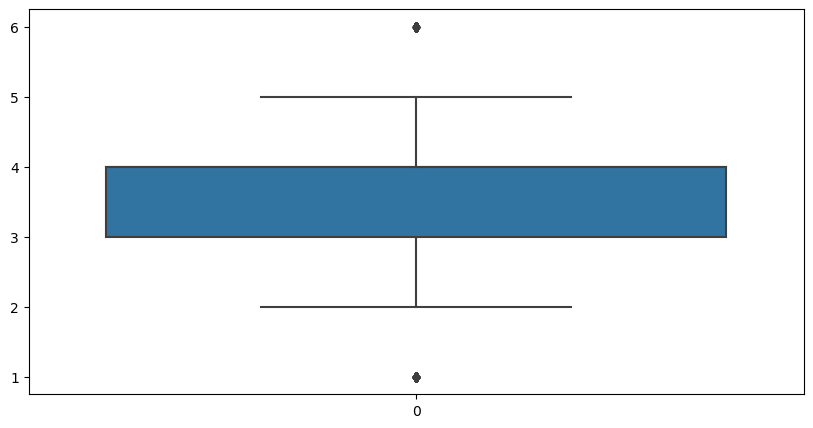

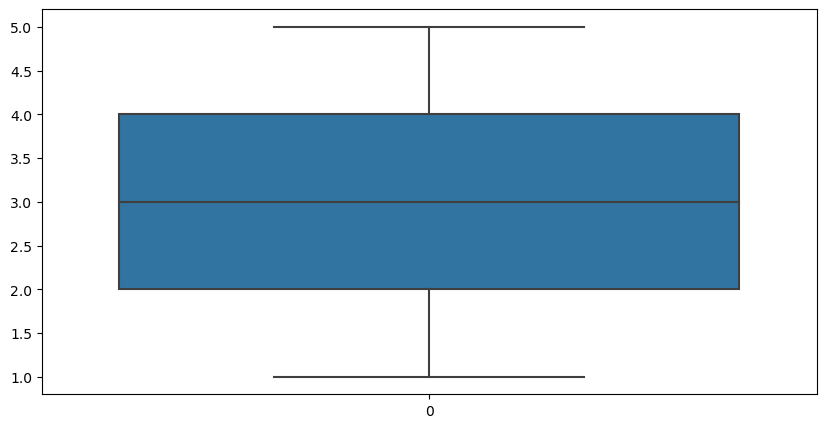

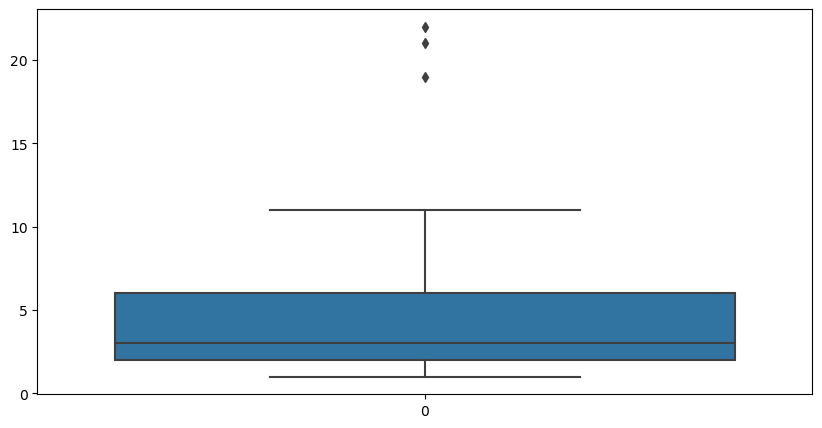

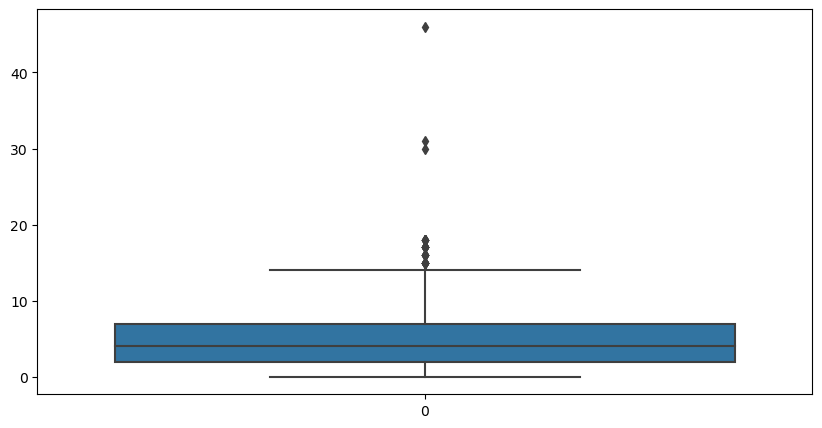

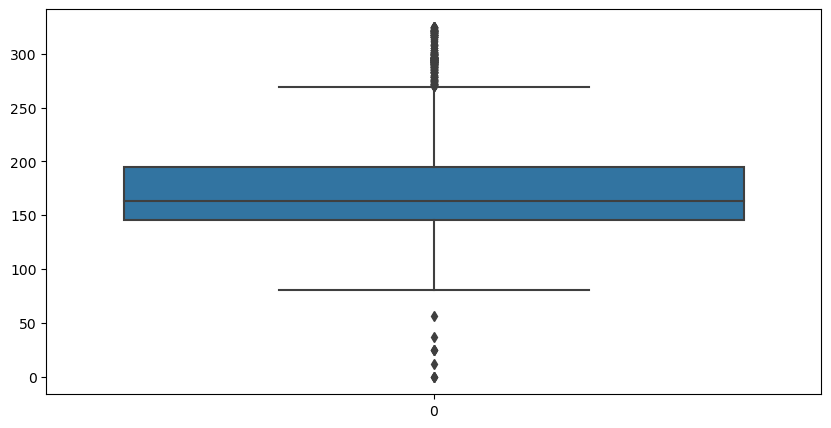

In [9]:
plt.subplots(figsize = (10, 5))
sns.boxplot(churn['Tenure'])
plt.annotate('Outlier', (churn['Tenure'].describe()['max'],0.1), xytext = (churn['Tenure'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = churn['Tenure'].describe()['75%'] - churn['Tenure'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(churn['WarehouseToHome'])
plt.annotate('Outlier', (churn['WarehouseToHome'].describe()['max'],0.1), xytext = (churn['WarehouseToHome'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = churn['WarehouseToHome'].describe()['75%'] - churn['WarehouseToHome'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(churn['NumberOfDeviceRegistered'])
plt.annotate('Outlier', (churn['NumberOfDeviceRegistered'].describe()['max'],0.1), xytext = (churn['NumberOfDeviceRegistered'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = churn['NumberOfDeviceRegistered'].describe()['75%'] - churn['NumberOfDeviceRegistered'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(churn['SatisfactionScore'])

plt.subplots(figsize = (10, 5))
sns.boxplot(churn['NumberOfAddress'])
plt.annotate('Outlier', (churn['NumberOfAddress'].describe()['max'],0.1), xytext = (churn['NumberOfAddress'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = churn['NumberOfAddress'].describe()['75%'] - churn['NumberOfAddress'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(churn['DaySinceLastOrder'])
plt.annotate('Outlier', (churn['DaySinceLastOrder'].describe()['max'],0.1), xytext = (churn['DaySinceLastOrder'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = churn['DaySinceLastOrder'].describe()['75%'] - churn['DaySinceLastOrder'].describe()['25%']

plt.subplots(figsize = (10, 5))
sns.boxplot(churn['CashbackAmount'])
plt.annotate('Outlier', (churn['CashbackAmount'].describe()['max'],0.1), xytext = (churn['CashbackAmount'].describe()['max'],0.3),
 arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = churn['CashbackAmount'].describe()['75%'] - churn['CashbackAmount'].describe()['25%']

Dari hasil boxplot di atas, terlihat bahwa beberapa variabel seperti Tenure, Warehouse To Home, Number Of Device Registered, Number Of Address, Day Since Last Order, dan Cashback Amount masih memiliki outlier. Untuk menangani outlier tersebut, langkah pertama yang akan diambil adalah dengan menghitung jumlah data outlier pada setiap kolom. Jika jumlah data outlier tergolong sedikit, maka data outlier tersebut dapat dihapus dari dataset. Namun, jika jumlah data outlier terlalu banyak, maka menghapus data tersebut dapat mengurangi jumlah sampel yang signifikan untuk pelatihan dan pengujian model.

In [10]:
from scipy import stats
z = np.abs(stats.zscore(churn._get_numeric_data()))
#mendapatkan data yang tidak outlier pada semua variabel
churn1 = churn[(z<3).all(axis=1)]
churn1

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.000000,4,Laptop & Accessory,3,Single,2,0,7.000000,143.32,0
1,7.0,25.000000,4,Mobile,1,Married,2,0,7.000000,129.29,0
2,27.0,13.000000,3,Laptop & Accessory,1,Married,5,0,7.000000,168.54,0
3,20.0,25.000000,4,Fashion,3,Divorced,7,0,4.531652,230.27,0
4,30.0,15.000000,4,Others,4,Single,8,0,8.000000,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.000000,5,Fashion,3,Married,8,0,1.000000,231.86,0
3937,8.0,7.000000,2,Mobile Phone,2,Single,4,0,4.000000,157.80,0
3938,30.0,6.000000,5,Laptop & Accessory,3,Married,3,1,2.000000,156.60,0
3939,6.0,15.650583,4,Mobile,3,Married,10,1,0.000000,124.37,1


Dapat dilihat bahwa setelah dilakukan mengatasi outlier, data customer churn menjadi sebanyak 3886 data. Lalu selanjutnya dilakukan pengecekan kembali menggunakan boxplot pada masing-masing variabel untuk mengetahui masihkah ada outlier dalam tiap variabel.

<Axes: >

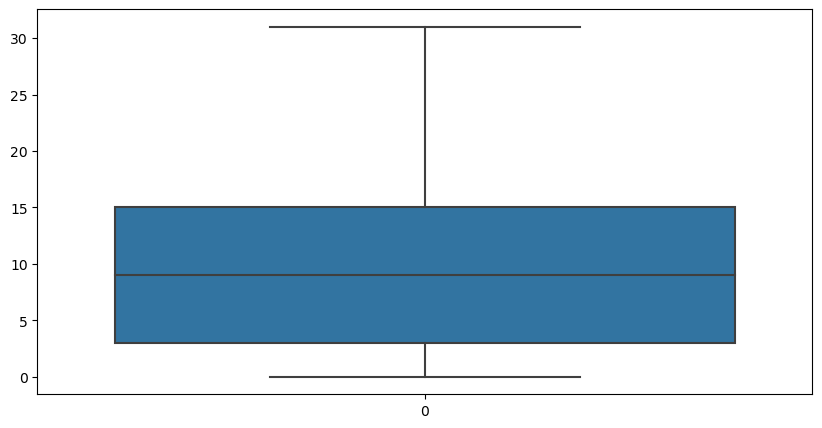

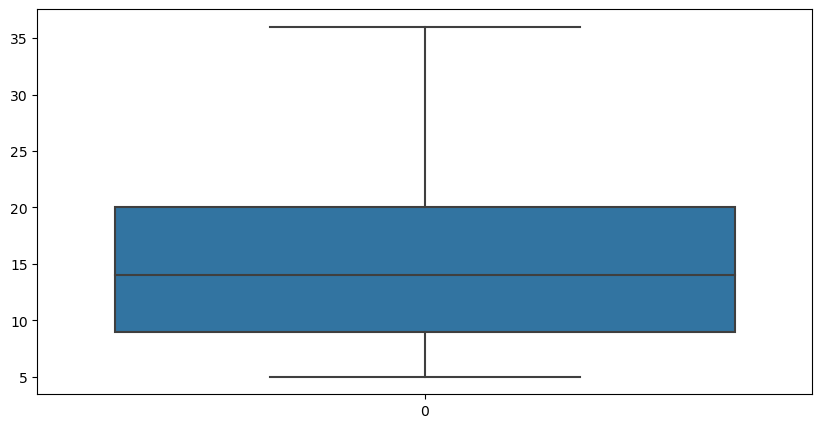

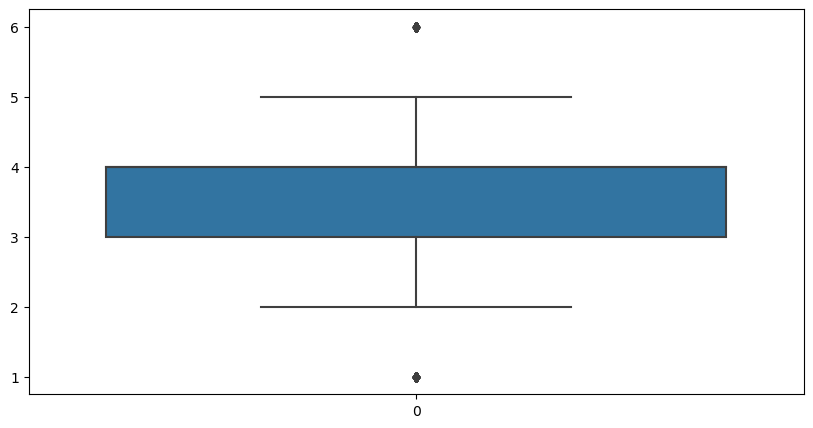

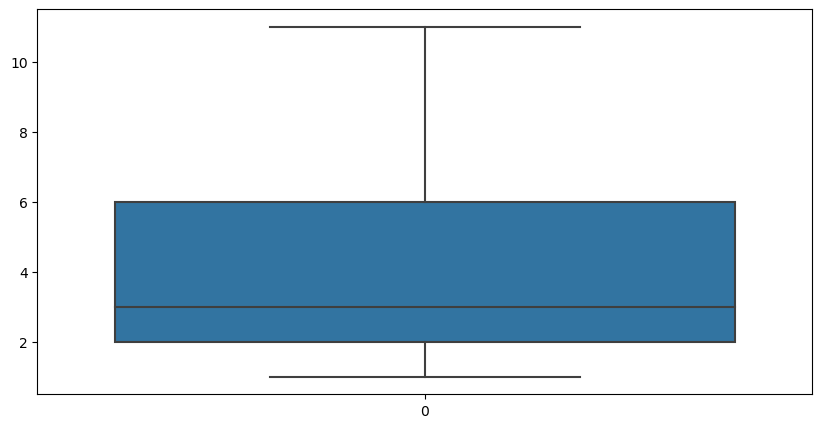

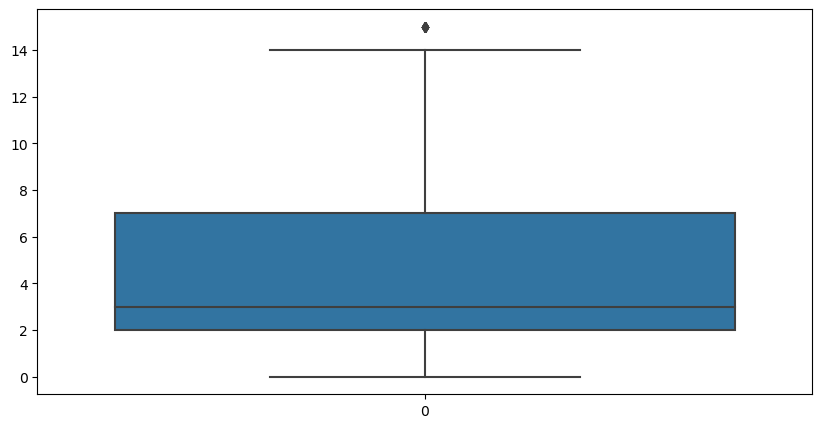

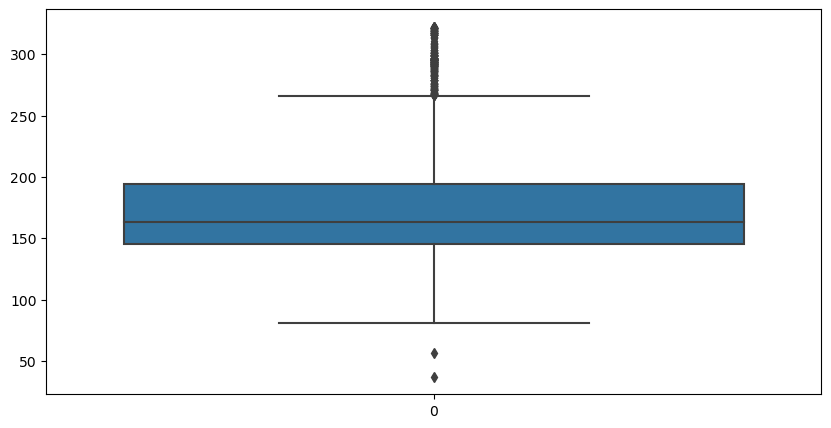

In [11]:
plt.subplots(figsize = (10, 5))
sns.boxplot(churn1['Tenure'])

plt.subplots(figsize = (10, 5))
sns.boxplot(churn1['WarehouseToHome'])

plt.subplots(figsize = (10, 5))
sns.boxplot(churn1['NumberOfDeviceRegistered'])

plt.subplots(figsize = (10, 5))
sns.boxplot(churn1['NumberOfAddress'])

plt.subplots(figsize = (10, 5))
sns.boxplot(churn1['DaySinceLastOrder'])

plt.subplots(figsize = (10, 5))
sns.boxplot(churn1['CashbackAmount'])

Dapat dilihat bahwa pada variabel Tenure, Warehouse To Home, dan Number Of Address sudah tidak terdapat outlier. Sedangkan  pada variabel Number of Device Registered, Day Since Last Order, dan Cashback Amount masih terdapat outlier. Namun pada variabel Cashback Amount bisa dikatakan bahwa outlier yang terdapat pada data ini termasuk banyak dan bisa jadi lebih dari 10% dari jumlah data, maka pada kasus ini outlier pada data customer churn ini tetap digunakan. Sehingga dapat dilanjutkan ke analisis.

**Imbalance**

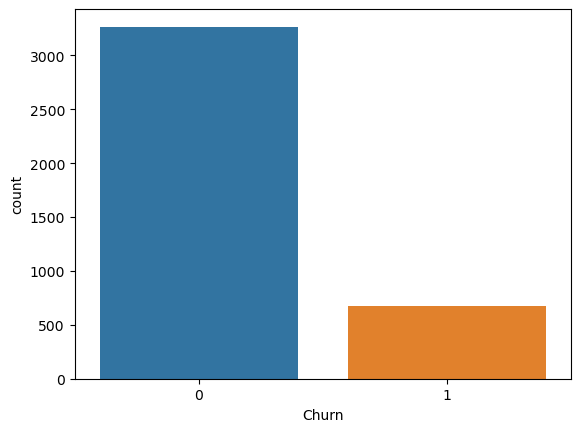

0    0.828977
1    0.171023
Name: Churn, dtype: float64


In [12]:
# Mencari apakah dataset (kolom churn) imbalanced atau tidak 
sns.countplot(x='Churn',data=churn)
plt.show() 
persentase = churn['Churn'].value_counts()/churn.shape[0]
print(persentase)


Dari hasil persentase di atas, terlihat bahwa nilai 0 (non-churn) memiliki persentase sebesar 82.90%, sedangkan nilai 1 (churn) memiliki persentase sebesar 17.10%. Dengan demikian, dapat disimpulkan bahwa terdapat ketidakseimbangan (imbalance) antara kelas 0 dan kelas 1 pada kolom Churn. Kelas mayoritas adalah kelas 0 dengan proporsi sekitar 82.90%, sedangkan kelas minoritas adalah kelas 1 dengan proporsi sekitar 17.10%. Ini menunjukkan bahwa dataset memiliki ketidakseimbangan kelas yang signifikan, yang dapat memengaruhi kinerja model dalam melakukan klasifikasi, khususnya untuk kelas minoritas.

**Mencari fitur apa saja yang kemungkinan menjadi prediktor yang baik**

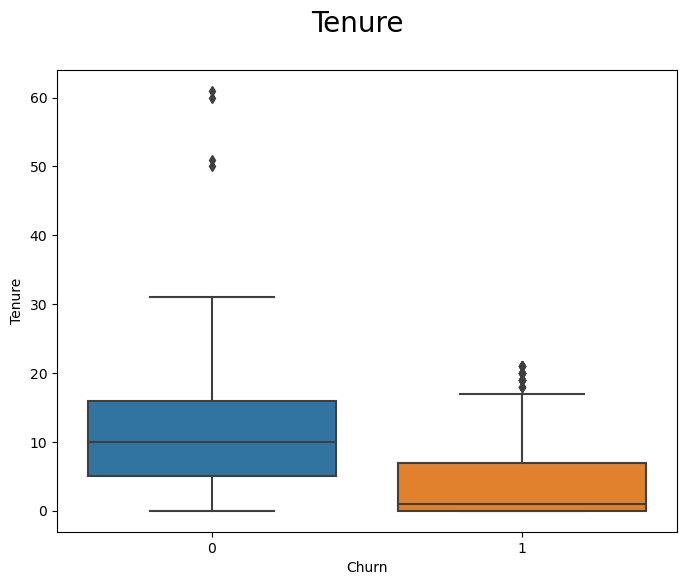

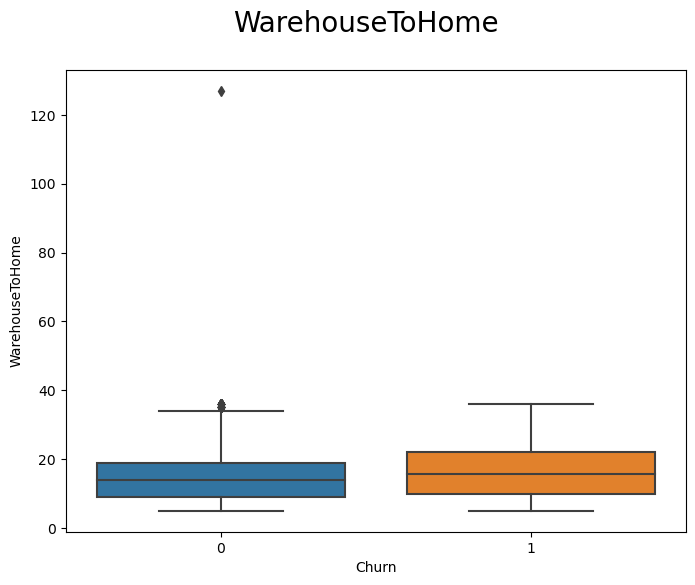

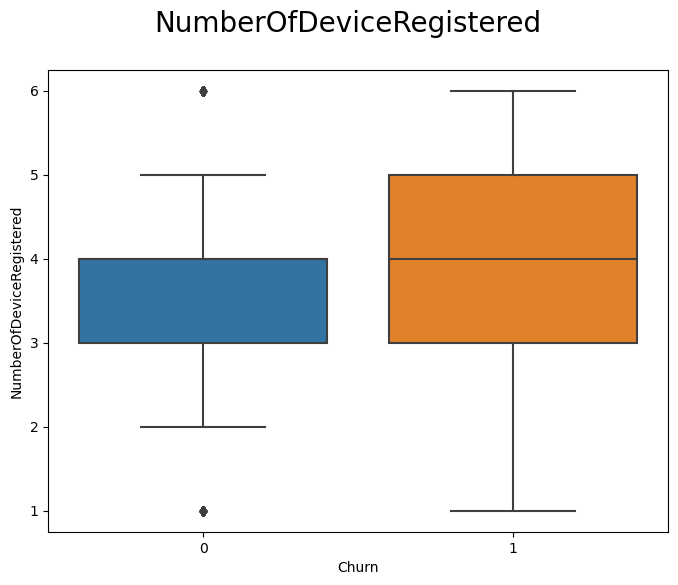

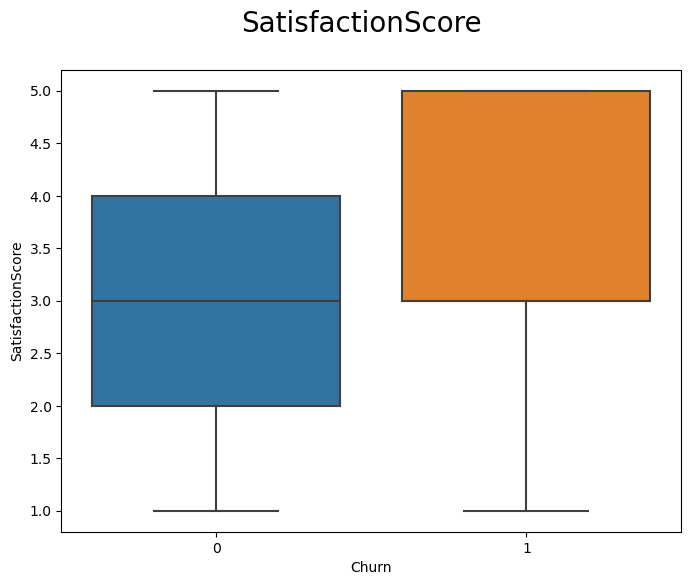

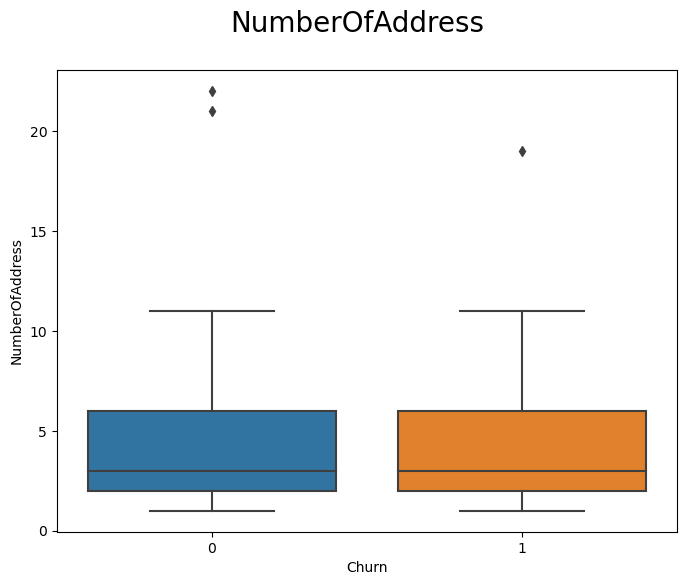

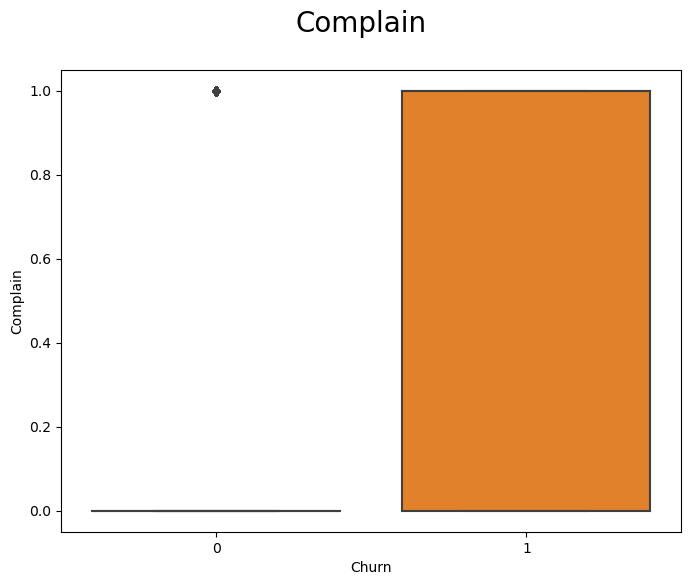

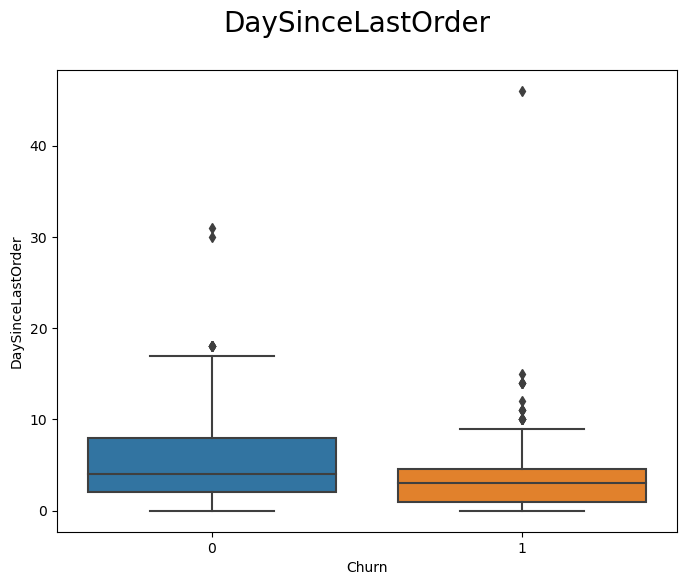

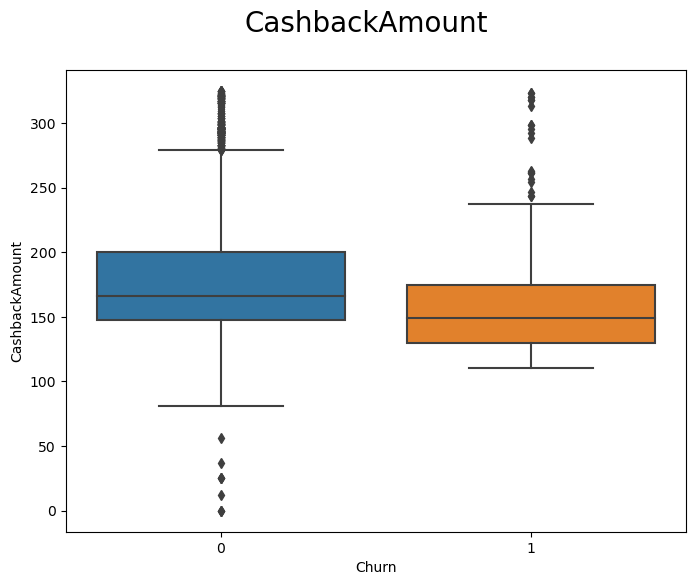

In [13]:
# Mencari fitur apa saja yang kemungkinan menjadi prediktor yang baik 
import matplotlib.pyplot as plt
import seaborn as sns

# Iterasi untuk membuat box plot untuk setiap fitur numerik terhadap kolom 'Churn'
for feature in churn.describe(exclude='object').columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.suptitle(feature, fontsize=20)
    sns.boxplot(data=churn, y=feature, x='Churn')
    plt.show()


Berdasarkan boxplot tersebut, dapat dilihat bahwa ada beberapa fitur yang mungkin dapat menjadi prediktor yang baik yaitu:
1. Tenure
2. NumberOfDeciveRegistered
3. SatisfactionScore
4. Complain
5. CashbackAmount

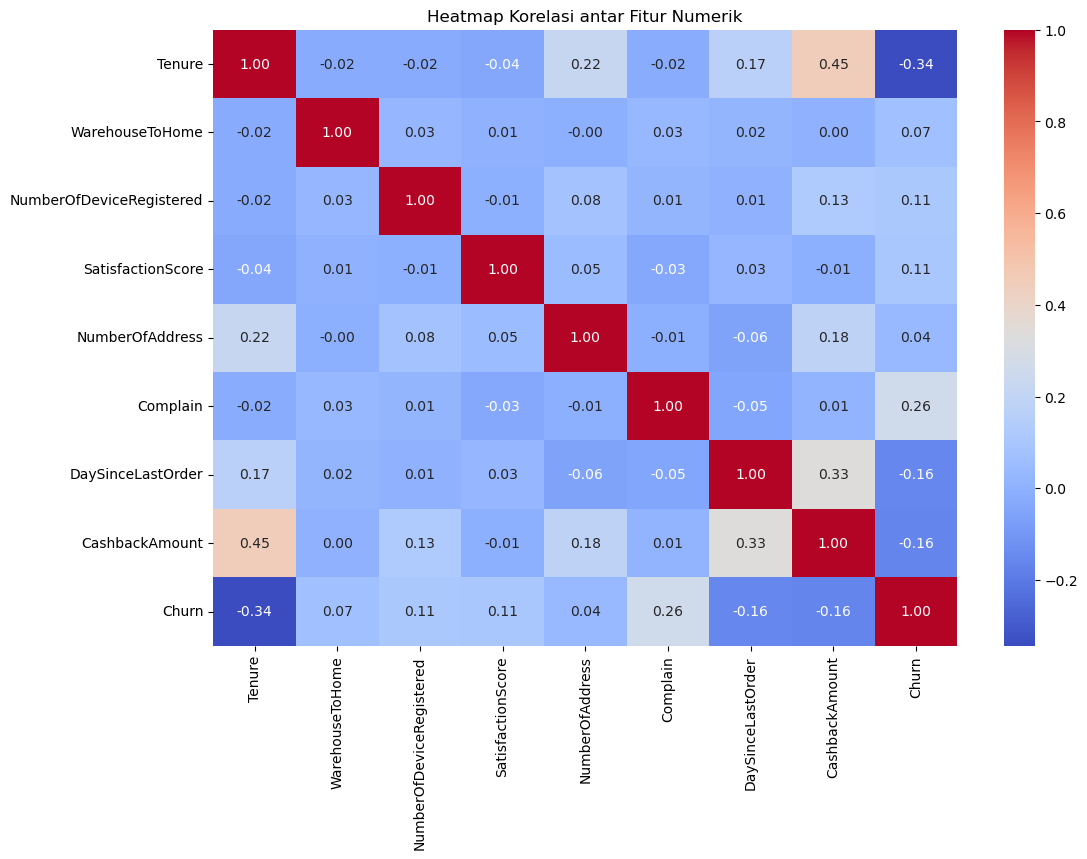

In [14]:
# Hitung matriks korelasi
correlation_matrix = churn.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

Dari matriks korelasi di atas, kita dapat mengamati bahwa korelasi tertinggi terdapat antara variabel 'Tenure' dan 'Churn' dengan nilai -0.343. Korelasi yang signifikan ini menunjukkan bahwa tenure pelanggan memiliki pengaruh yang kuat terhadap keputusan pelanggan untuk melakukan Churn. Semakin lama pelanggan menjadi customer, semakin rendah kemungkinan mereka akan melakukan Churn. Oleh karena itu, fitur 'Tenure' dapat dianggap sebagai prediktor terbaik untuk memprediksi kemungkinan Churn.

# Summary Data Understanding dan Data Cleaning

**Informasi Dasar Dataset:**  
Jumlah kolom: 11  
Jumlah baris: 3941  
DataType dari setiap kolom: Terdiri dari float, integer, dan object.  


**Data Kosong (Null/NaN):**  
Kolom Tenure memiliki 194 data kosong.  
Kolom WarehouseToHome memiliki 169 data kosong.  
Kolom DaySinceLastOrder memiliki 213 data kosong.  
Dilakukan imputasi menggunakan mean karena distribusi data normal.  


**Deskripsi Dataset:**  
Rata-rata tenure pelanggan adalah sekitar 10.08 bulan dengan variasi yang signifikan.  
Mayoritas pelanggan terdaftar untuk menggunakan 3 atau 4 perangkat.  
Skor kepuasan rata-rata adalah sekitar 3.09, menunjukkan kepuasan sedang.  
Sekitar 28% dari pelanggan mengajukan keluhan dalam satu bulan terakhir.  

**Outlier:**  
Terdapat outlier pada kolom Tenure, Warehouse To Home, Number Of Device Registered, Number Of Address, Day Since Last Order, dan Cashback Amount.

**Predictor Feature:**  
Fitur yang mungkin menjadi prediktor yang baik berdasarkan analisis univariate dan korelasi antara fitur numerik dan target variabel adalah:  
Tenure  
NumberOfDeviceRegistered  
SatisfactionScore  
Complain    
CashbackAmount  


# Data Eksplorasi

**Persentase e-customer churn**

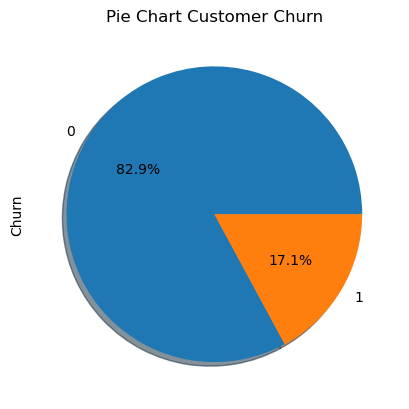

In [15]:
tipe = churn['Churn'].value_counts()
tipe.plot.pie(autopct='%.1f%%', shadow=True)
plt.title('Pie Chart Customer Churn')
plt.show()

Dari pie chart diatas dapat disimpulkan bahwa masih banyak e-customer yang tidak churn, dibuktikan dengan persentase e-customer yang tidak churn lebih besar daripada e-customer churn yaitu sebesar 82,9% dengan keterangan angka 0 sedangkan e-customer  hanya sebesar 17,1% dengan keterangan angka 1.

**Sebaran customer berdasarkan masa jabatan**

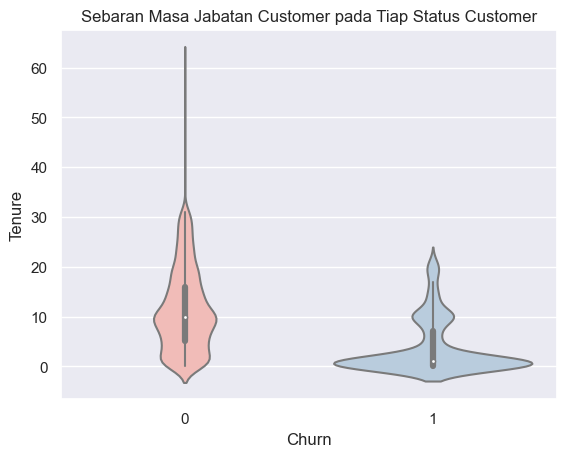

In [16]:
sns.set(style="darkgrid")
sns.violinplot(x='Churn',y='Tenure',data=churn,palette="Pastel1")
plt.title('Sebaran Masa Jabatan Customer pada Tiap Status Customer')
plt.show()

Dari violin plot diatas, dapat disimpulkan bahwa kepadatan peluang kedua jenis nasabah tidak merata yang ditunjukkan dengan bentuk violin yang tidak cembung. Karena persebaran datanya belum terlalu jelas, maka ditambahkan boxplot untuk membantu membacanya. Dari boxplot tersebut nampak bahwa rata-rata masa jabatan pada customer yang tidak churn lebih tinggi dari pada rata-rata masa jabatan pada masa jabatan pada customer yang akan churn. Jadi dapat diilustrasikan bahwa customer yang akan churn hanya memiliki masa jabatan yang lebih sedikit daripada customer yang tidak churn ditunjukkan pada rata-rata pada tiap status customer yang ditandai dengan titik berwarna kuning yang dimana pada customer yang churn terletak lebih bawah daripada customer yang tidak churn.

**Sebaran customer berdasarkan jarak gudang ke rumah Pelanggan**

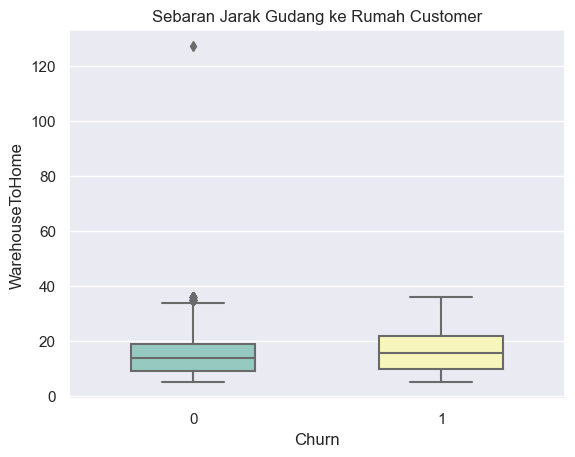

In [17]:
sns.boxplot(x="Churn", y="WarehouseToHome", data=churn, palette="Set3", width=0.5)
plt.title('Sebaran Jarak Gudang ke Rumah Customer')
plt.show()

Dari whisker plot diatas, dapat disimpulkan bahwa pada jarak gudang dari rumah customer untuk customer yang tidak churn terdapat data oulier dibuktikan dengan terdapat titik di atas boxplot customer yang tidak churn. Kemudian rata-rata jarak pada kedua jenis customer berada diantara 0-20, akan tetapi bagian customer yang akan churn menunjukan rata-rata jarak gudang yang lebih tinggi dari pada customer yang tidak churn. Dari pernyataan di atas, dapat diilustrasikan bahwa semakin jauh jarak gudang dari rumah customer maka semakin besar pula rasio customer untuk churn.

**Sebaran customer berdasarkan jumlah perangkat yang terdaftar**

<function matplotlib.pyplot.show(close=None, block=None)>

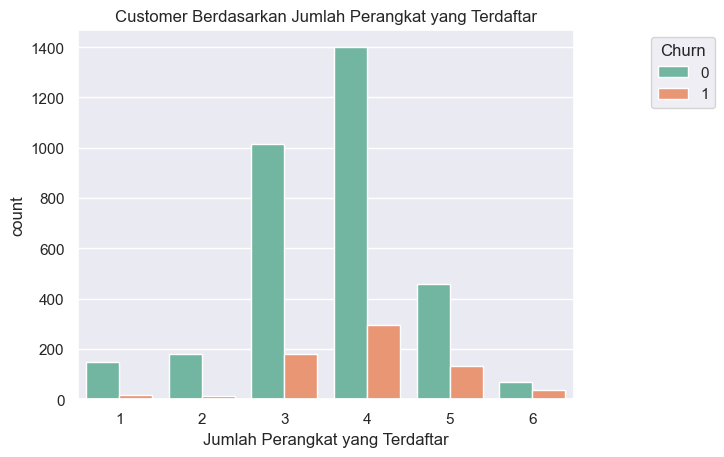

In [18]:
sns.countplot(x='NumberOfDeviceRegistered',hue ='Churn', data=churn, palette="Set2")
plt.xlabel('Jumlah Perangkat yang Terdaftar')
plt.title('Customer Berdasarkan Jumlah Perangkat yang Terdaftar')
plt.legend(title = 'Churn',bbox_to_anchor=(1.3,1))
plt.show

Dari count plot diatas terlihat bahwa customer tersebut kebanyakan memiliki jumlah perangkat yang terdaftar sebanyak 4 baik pada customer yang tidak churn maupun customer yang akan churn. Sedangkan hanya sedikit customer yang mendaftarkan hingga 6 perangkat. Jadi, dapat disimpulkan bahwa customer yang akan churn memiliki jumlah perangkat yang terdaftar sebanyak 4.

**Sebaran customer berdasarkan skor kepuasan**

<function matplotlib.pyplot.show(close=None, block=None)>

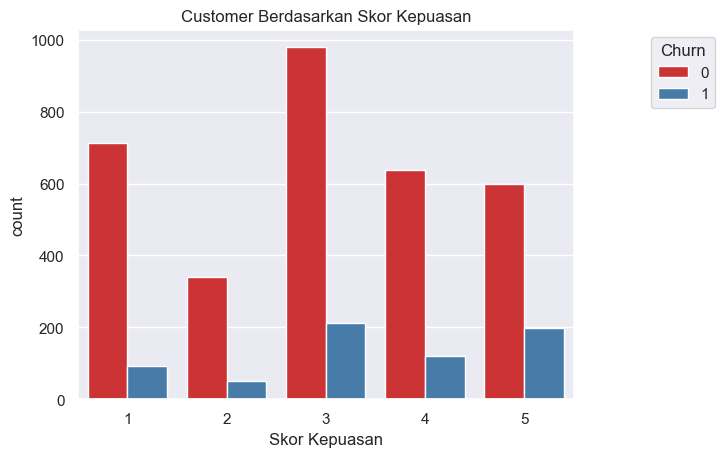

In [19]:
sns.countplot(x='SatisfactionScore',hue ='Churn', data=churn, palette="Set1")
plt.xlabel('Skor Kepuasan')
plt.title('Customer Berdasarkan Skor Kepuasan')
plt.legend(title = 'Churn',bbox_to_anchor=(1.3,1))
plt.show

Dari count plot diatas terlihat bahwa customer tersebut kebanyakan memberi skor kepuasan 3 baik pada customer yang tidak churn maupun customer yang akan churn. Sedangkan yang paling sedikit customer memberi skor kepuasan 2. Jadi, dapat disimpulkan bahwa customer yang akan churn memberi skor 3.

**Sebaran customer berdasarkan kategori pesanan pilihan pelanggan dalam sebulan terakhir dan status pernikahan**

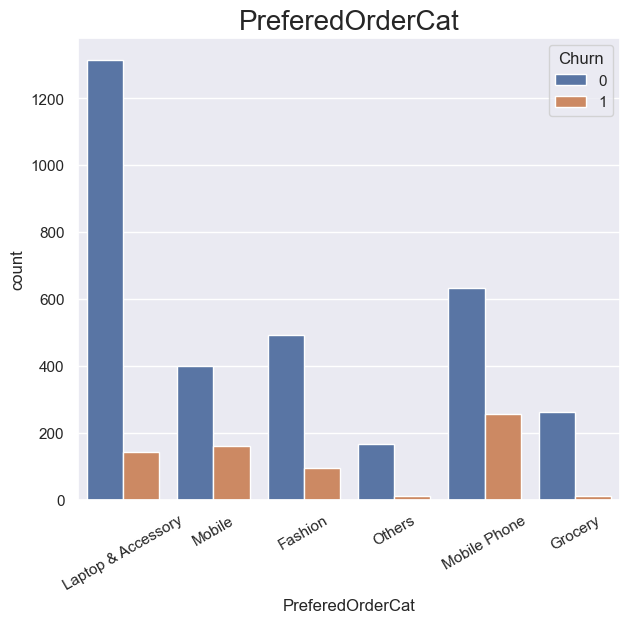

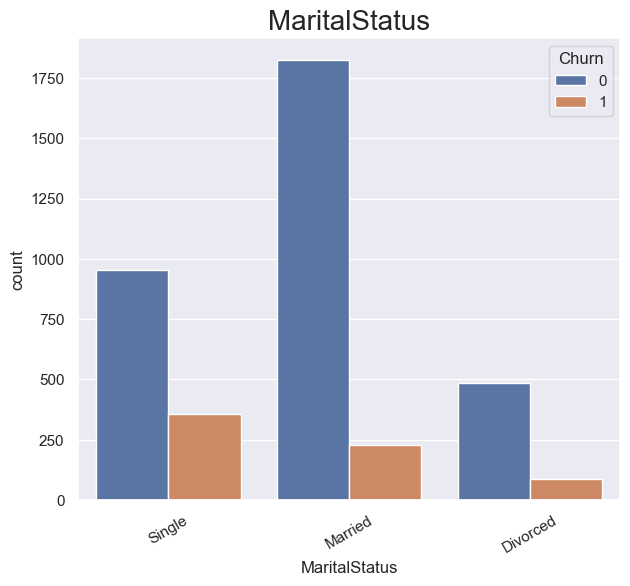

In [20]:
# pelanggan sepe rti apa yang paling banyak terjadinya Churn
for a in churn.describe(include='object').columns:
    plt.figure(figsize=(7,6))
    sns.countplot(x=a,data=churn,hue='Churn')
    plt.title(a, fontsize=20)
    plt.xticks(rotation=30)
    plt.show()

Berdasarkan countplot diatas, dapat dilihat bahwa barang yang paling banyak dipesan oleh customer yang tidak churn dalam sebulan terakhir yaitu laptop dan aksesoris. Sedangkan barang yang paling banyak dipesan oleh customer yang akan churn dalam sebulan terakhir yaitu mobile phone. Berdasarkan count plot status pernikahan juga dapat dilihat bahwa customer yang tidak churn kebanyakan customer yang sudah menikah, sedangkan customer yang akan churn kebanyakan masih single.

**Sebaran customer berdasarkan nomor alamat**

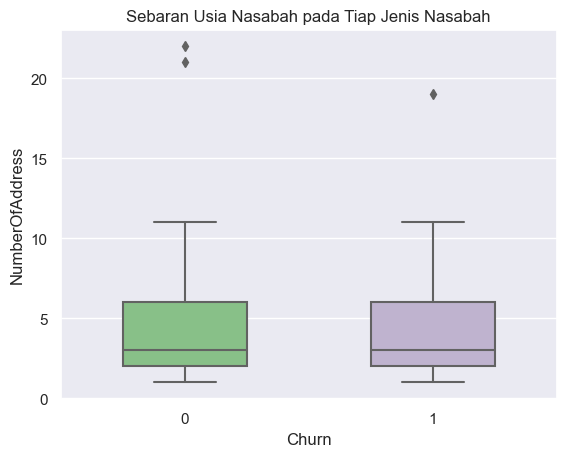

In [21]:
sns.boxplot(x="Churn", y="NumberOfAddress", data=churn, palette="Accent", width=0.5)
plt.title('Sebaran Usia Nasabah pada Tiap Jenis Nasabah')
plt.show()

Berdasarkan whisker plot diatas, dapat dilihat bahwa dari boxplot pada customer yang akan churn dan customer yang tidak churn memiliki data outlier yang ditunjukkan dengan tanda titik diatas boxplot. Untuk rata-rata dari kedua jenis customer adalah sama antara 0-5 ditunjukkan dengan garis tengah yang simetris.

**Sebaran customer berdasarkan komplain**

<function matplotlib.pyplot.show(close=None, block=None)>

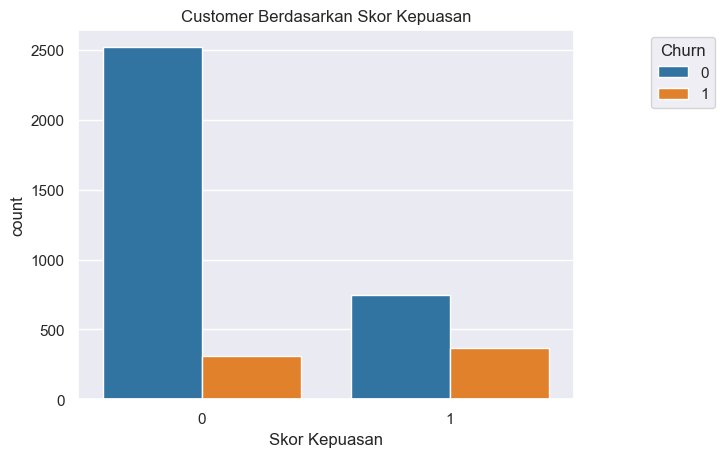

In [22]:
sns.countplot(x='Complain',hue ='Churn', data=churn, palette="tab10")
plt.xlabel('Skor Kepuasan')
plt.title('Customer Berdasarkan Skor Kepuasan')
plt.legend(title = 'Churn',bbox_to_anchor=(1.3,1))
plt.show

Dari countplot diatas, dapat dilihat bahwa kebanyakan customer tidak komplain. Untuk customer yang tidak churn kebanyakan tidak melakukan komplain, sedangkan untuk customer yang akan churn kebanyakan melakukan komplain.

**Sebaran customer berdasarkan hari sejak terakhir order**

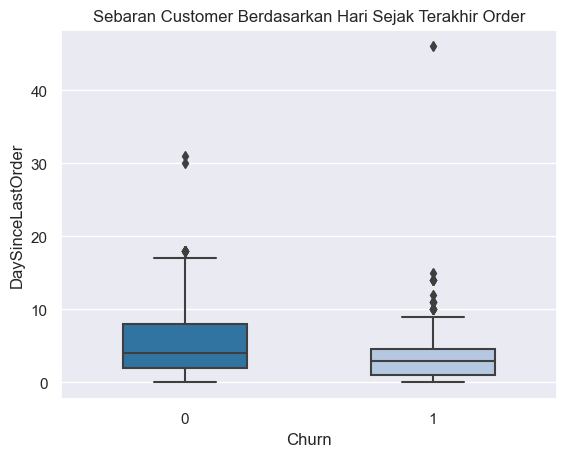

In [23]:
sns.boxplot(x="Churn", y="DaySinceLastOrder", data=churn, palette="tab20", width=0.5)
plt.title('Sebaran Customer Berdasarkan Hari Sejak Terakhir Order')
plt.show()

Dari whisker plot diatas, dapat disimpulkan bahwa pada boxplot hari sejak terakhir order customer untuk customer yang tidak churn terdapat data oulier dibuktikan dengan terdapat titik di atas boxplot customer yang tidak churn. Kemudian rata-rata hari pada kedua jenis customer berada diantara 0-10, akan tetapi bagian customer yang tidak churn menunjukan rata-rata hari lebih tinggi dari pada customer yang akan churn. Dari pernyataan di atas, dapat diilustrasikan bahwa semakin sedikit hari sejak terakhir order customer maka semakin besar pula rasio customer untuk churn.

**Sebaran customer berdasarkan cashback yang diterima**

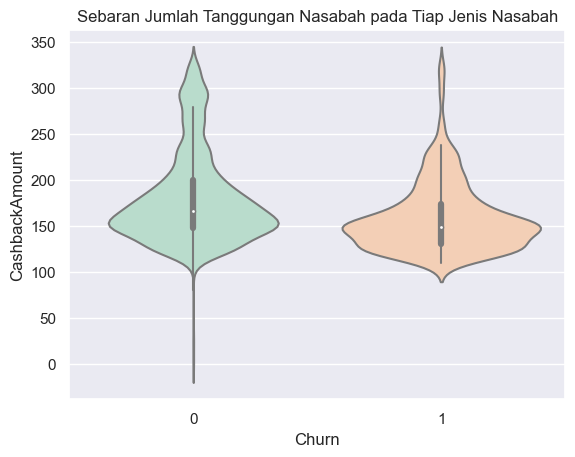

In [24]:
sns.set(style="darkgrid")
sns.violinplot(x='Churn',y='CashbackAmount',data=churn,palette="Pastel2")
plt.title('Sebaran Jumlah Tanggungan Nasabah pada Tiap Jenis Nasabah')
plt.show()

Dari violin plot diatas, dapat disimpulkan bahwa kepadatan peluang kedua jenis nasabah tidak merata yang ditunjukkan dengan bentuk violin yang tidak cembung. Karena persebaran datanya belum terlalu jelas, maka ditambahkan boxplot untuk membantu membacanya. Dari boxplot tersebut nampak bahwa rata-rata cashback yang diterima customer yang tidak churn lebih tinggi dari pada rata-rata cashback yang diterima pada masa jabatan pada customer yang akan churn. Jadi dapat diilustrasikan bahwa customer yang akan churn yang menerima cashback yang lebih sedikit daripada customer yang tidak churn ditunjukkan pada rata-rata pada tiap status customer yang ditandai dengan titik berwarna kuning yang dimana pada customer yang churn terletak lebih bawah daripada customer yang tidak churn.

### Mengubah data kategori  

Sebelum melakukan analisis lebih lanjut, kita akan melakukan encoding terhadap 2 kolom kategorikal yaitu 'PreferedOrderCat' dan 'MaritalStatus'

In [25]:
#mengubah data
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace('Laptop & Accessory', '1')
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace('Mobile Phone', '2')
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace('Fashion', '3')
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace('Mobile', '4')
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace('Grocery', '5')
churn['PreferedOrderCat'] = churn['PreferedOrderCat'].replace('Others', '6')

print(churn['PreferedOrderCat'].value_counts())

1    1458
2     887
3     585
4     559
5     273
6     179
Name: PreferedOrderCat, dtype: int64


In [26]:
#mengubah data
churn['MaritalStatus'] = churn['MaritalStatus'].replace('Single', '1')
churn['MaritalStatus'] = churn['MaritalStatus'].replace('Married', '2')
churn['MaritalStatus'] = churn['MaritalStatus'].replace('Divorced', '3')

print(churn['MaritalStatus'].value_counts())

2    2055
1    1310
3     576
Name: MaritalStatus, dtype: int64


## Modeling dan Evaluasi

**Panggil Library dari tap Package**

In [27]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,average_precision_score,roc_auc_score
from sklearn.metrics import r2_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Import libarary Gaussian Naive Bayes
from sklearn import naive_bayes

**Data Splitting**  


Pada proses data splitting ini kita akan membagi dataset menjadi 2 bagian yaitu data untuk training dan data untuk testing. Pembagian data tersebut kita atur sebesar 80% data untuk data training dan 20% data untuk data testing.

In [28]:
X=churn.drop(columns=['Churn'])
y=churn['Churn']

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
#Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
# Deskripsi singkat data training
print("Info Data Training:")
print(X_train.info())

# Deskripsi singkat data testing
print("Info Data Testing:")
print(X_test.info())

Info Data Training:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 2484 to 2732
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3152 non-null   float64
 1   WarehouseToHome           3152 non-null   float64
 2   NumberOfDeviceRegistered  3152 non-null   int64  
 3   PreferedOrderCat          3152 non-null   object 
 4   SatisfactionScore         3152 non-null   int64  
 5   MaritalStatus             3152 non-null   object 
 6   NumberOfAddress           3152 non-null   int64  
 7   Complain                  3152 non-null   int64  
 8   DaySinceLastOrder         3152 non-null   float64
 9   CashbackAmount            3152 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 270.9+ KB
None
Info Data Testing:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 1271 to 2470
Data columns (total 10 columns):
 #   Column  

Dari deskripsi data training dan testing di atas, dapat dilihat bahwa:

1. Data training terdiri dari 3152 entri, sedangkan data testing terdiri dari 789 entri.
2. Kedua dataset memiliki 10 kolom, termasuk 4 kolom bertipe float64, 4 kolom bertipe int64, dan 2 kolom bertipe object.
3. Tidak ada nilai yang hilang (null) pada kedua dataset

**Modelling**

Selanjutnya kita akan memulai tahap pembuatan model machine learning. Pembuatan model ini kita akan menggunakan beberapa metode dengan parameter defaultnya. Ada 8 metode yang akan kita coba yaitu :

1. Logistic Regression
2. KNeighbours Classifier
3. Naive Bayes
4. Random Forest Classifier
5. Decision Tree Classifier

### Regresi Logistik

In [32]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)
Y_predlr = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test, Y_predlr)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predlr)
accuracy = accuracy_score(y_test,Y_predlr)
precision = precision_score(y_test, Y_predlr)
recall = recall_score(y_test, Y_predlr)
f1 = f1_score(y_test,Y_predlr)
PRscore = average_precision_score(y_test,Y_predlr)

logreg_probs= logreg.predict_proba(X_test)
logreg_probs=logreg_probs[:,1]
logreg_auc = roc_auc_score(y_test, logreg_probs)

print('Confusion matrix for Logistic Regression with 80% : 20% \n', cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)
print('PR-score_Logistic Regression : %.3f' %PRscore)
print('ROC-AUC-score_Logistic Regression : %.3f' %logreg_auc)

Confusion matrix for Logistic Regression with 80% : 20% 
 [[618  28]
 [ 85  58]]
accuracy_Logistic Regression : 0.857
precision_Logistic Regression : 0.674
recall_Logistic Regression: 0.406
f1-score_Logistic Regression : 0.507
PR-score_Logistic Regression : 0.381
ROC-AUC-score_Logistic Regression : 0.860


Dari hasil klasifikasi menggunakan regresi logistik diperoleh accuracy 85.7%, precision 67.4%, recall 40.6%, F1 score 50.7%, dan PR score sebesar 38.1%. Dari hasil tersebut kualitas klasifikasi menggunakan regresi logistik ini masih kurang berhasil karena diperoleh hasil precision dan recall yang rendah. Klasifikasi menggunakan regresi logistik memiliki ROC-AUC score sebesar 0.86 yang dimana termasuk klasifikasi yang baik dengan kurva ROC seperti gambar di bawah ini.

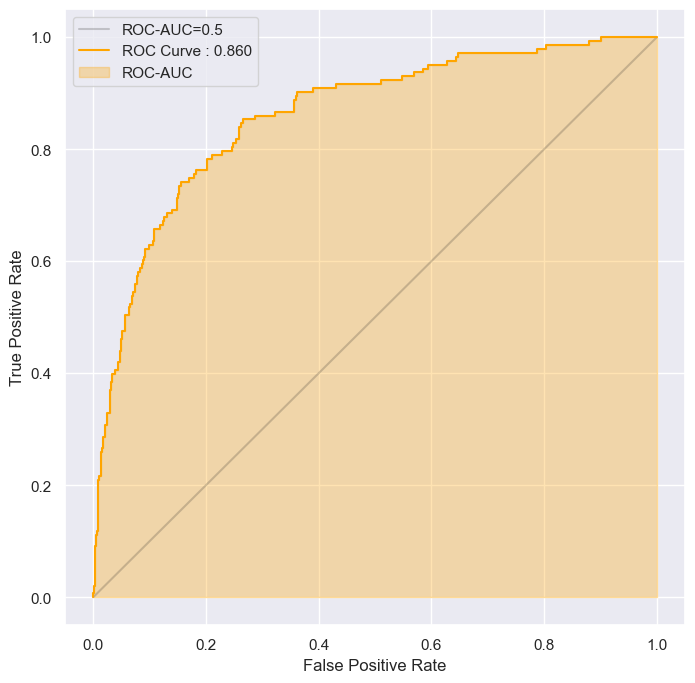

In [33]:
from sklearn import metrics
fprs, tprs, thresholds = metrics.roc_curve(y_test, logreg_probs)

# plot ROC
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
plt.plot(fprs, tprs, color="orange", label="ROC Curve : %.3f" % logreg_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Isi area yang sesuai dengan skor ROC-AUC
y_zeros = [0 for _ in tprs]
plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
plt.legend()
plt.show()

### K-nearest Neighbors

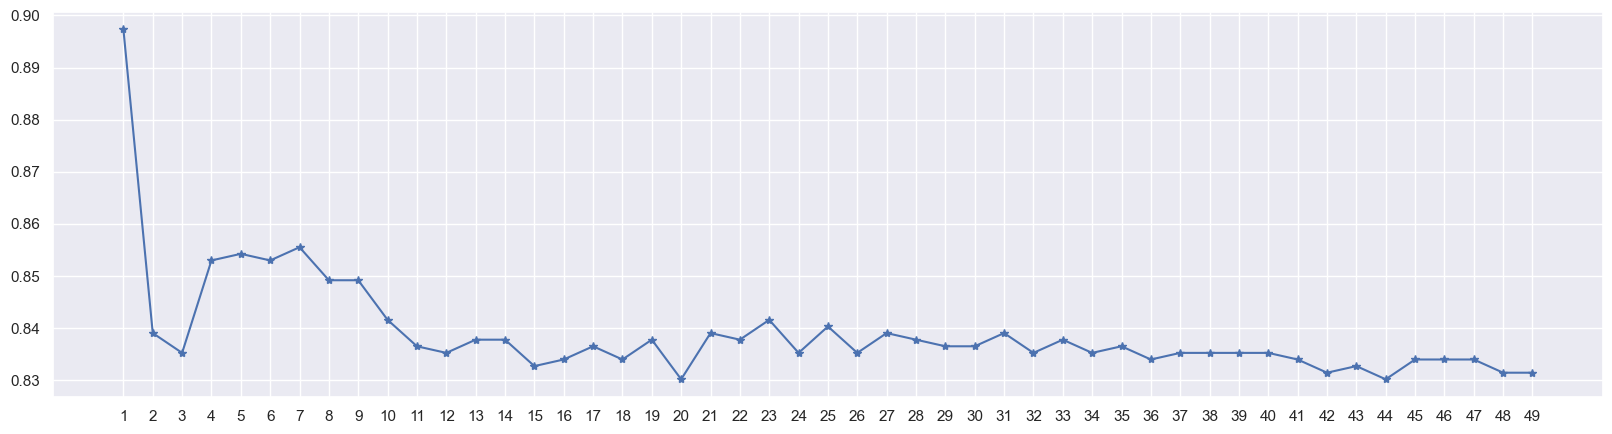

In [34]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
Y_predknn = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_predknn)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predknn)
accuracy = accuracy_score(y_test,Y_predknn)
precision = precision_score(y_test, Y_predknn)
recall = recall_score(y_test, Y_predknn)
f1 = f1_score(y_test,Y_predknn)
PRscore = average_precision_score(y_test,Y_predknn)

knn_probs= knn.predict_proba(X_test)
knn_probs=knn_probs[:,1]
knn_auc = roc_auc_score(y_test, knn_probs)

print('Confusion matrix for KNN with 80% : 20% \n', cm)
print('accuracy_KNN : %.3f' % accuracy)
print('precision_KNN : %.3f' % precision)
print('recall_KNN: %.3f' % recall)
print('f1-score_KNN : %.3f' % f1)
print('PR-score_KNN : %.3f' %PRscore)
print('ROC-AUC-score_KNN : %.3f' %knn_auc)

Confusion matrix for KNN with 80% : 20% 
 [[610  36]
 [ 45  98]]
accuracy_KNN : 0.897
precision_KNN : 0.731
recall_KNN: 0.685
f1-score_KNN : 0.708
PR-score_KNN : 0.558
ROC-AUC-score_KNN : 0.815


Dari hasil klasifikasi menggunakan K-nearest neighbours diperoleh accuracy 89.7%, precision 73.1%, recall 68.5%, F1 score 70.8%, dan PR score sebesar 55.8%. Dari hasil tersebut kualitas klasifikasi menggunakan K-nearest neighbors ini lumayan berhasil karena diperoleh hasil recall dan precision yang lumayan tinggi namun PR scorenya rendah. Klasifikasi menggunakan K-nearest neighbors memiliki ROC-AUC score sebesar 0.81 yang dimana termasuk klasifikasi yang baik dengan kurva ROC seperti gambar di bawah ini.

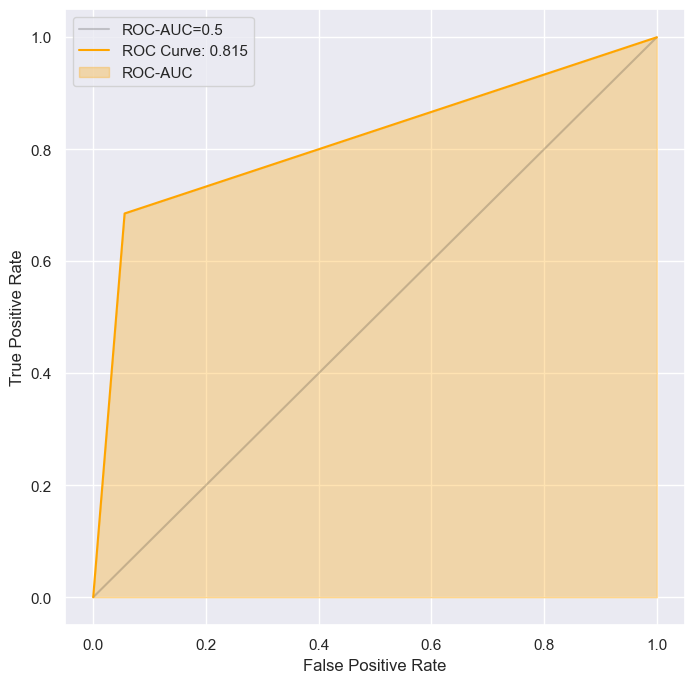

In [36]:
from sklearn import metrics
fprs, tprs, thresholds = metrics.roc_curve(y_test, knn_probs)

# plot ROC
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
plt.plot(fprs, tprs, color="orange", label="ROC Curve: %.3f" % knn_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Isi area yang sesuai dengan skor ROC-AUC
y_zeros = [0 for _ in tprs]
plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
plt.legend()
plt.show()

### Naive Bayes

In [37]:
gaussian = naive_bayes.GaussianNB()
gaussian.fit(X_train, y_train)
Y_prednb = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_prednb)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_prednb)
accuracy = accuracy_score(y_test,Y_prednb)
precision = precision_score(y_test, Y_prednb)
recall = recall_score(y_test, Y_prednb)
f1 = f1_score(y_test,Y_prednb)
PRscore = average_precision_score(y_test,Y_prednb)

nb_probs= gaussian.predict_proba(X_test)
nb_probs=nb_probs[:,1]
nb_auc = roc_auc_score(y_test, nb_probs)

print('Confusion matrix for Naive Bayes with 80% : 20%\n', cm)
print('accuracy_Naive Bayes: %.3f' % accuracy)
print('precision_Naive Bayes: %.3f' % precision)
print('recall_Naive Bayes: %.3f' % recall)
print('f1-score_Naive Bayes : %.3f' % f1)
print('PR-score_Naive Bayes : %.3f' %PRscore)
print('ROC-AUC-score_Naive Bayes : %.3f' %nb_auc)

Confusion matrix for Naive Bayes with 80% : 20%
 [[606  40]
 [ 65  78]]
accuracy_Naive Bayes: 0.867
precision_Naive Bayes: 0.661
recall_Naive Bayes: 0.545
f1-score_Naive Bayes : 0.598
PR-score_Naive Bayes : 0.443
ROC-AUC-score_Naive Bayes : 0.835


Dari hasil klasifikasi menggunakan Naive Bayes diperoleh accuracy 86.7%, precision 66.1%, recall 54.5%, F1 score 59.8%, dan PR score sebesar 44.3%. Dari hasil tersebut kualitas klasifikasi menggunakan Naive Bayes ini masih kurang berhasil karena diperoleh hasil precision dan recall yang rendah. Klasifikasi menggunakan Naive Bayes memiliki ROC-AUC score sebesar 0.83 yang dimana termasuk klasifikasi yang baik dengan kurva ROC seperti gambar di bawah ini.

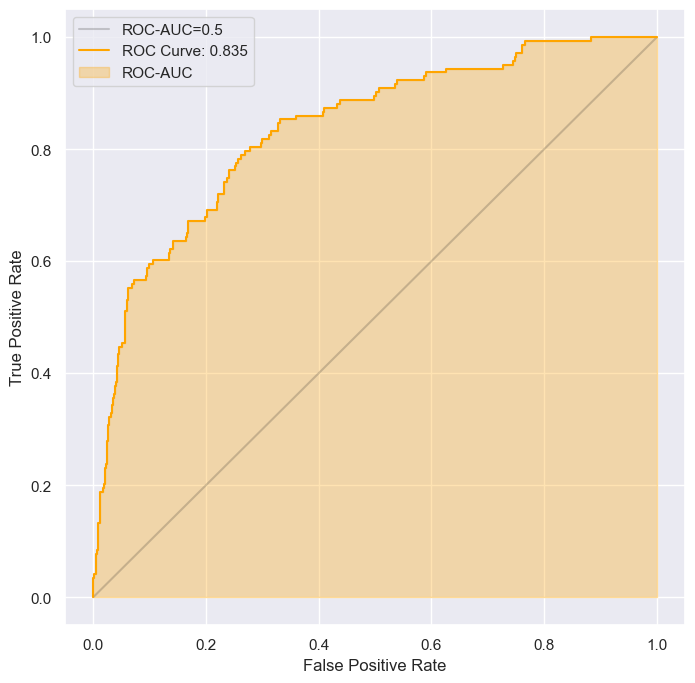

In [38]:
from sklearn import metrics
fprs, tprs, thresholds = metrics.roc_curve(y_test, nb_probs)

# plot ROC
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
plt.plot(fprs, tprs, color="orange", label="ROC Curve: %.3f" % nb_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Isi area yang sesuai dengan skor ROC-AUC
y_zeros = [0 for _ in tprs]
plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
plt.legend()
plt.show()

### Random Forest

In [39]:
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_predrf = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_predrf)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_predrf)
accuracy = accuracy_score(y_test,Y_predrf)
precision = precision_score(y_test, Y_predrf)
recall = recall_score(y_test, Y_predrf)
f1 = f1_score(y_test,Y_predrf)
PRscore = average_precision_score(y_test,Y_predrf)

rf_probs= random_forest.predict_proba(X_test)
rf_probs= rf_probs[:,1]
rf_auc = roc_auc_score(y_test, rf_probs)

print('Confusion matrix for Random Forest with 80% : 20%\n', cm)
print('accuracy_random_Forest : %.3f' % accuracy)
print('precision_random_Forest : %.3f' % precision)
print('recall_random_Forest : %.3f' % recall)
print('f1-score_random_Forest : %.3f' % f1)
print('PR-score_random_Forest : %.3f' %PRscore)
print('ROC-AUC-score_random_Forest : %.3f' %rf_auc)

Confusion matrix for Random Forest with 80% : 20%
 [[634  12]
 [ 36 107]]
accuracy_random_Forest : 0.939
precision_random_Forest : 0.899
recall_random_Forest : 0.748
f1-score_random_Forest : 0.817
PR-score_random_Forest : 0.718
ROC-AUC-score_random_Forest : 0.967


Dari hasil klasifikasi menggunakan random forest diperoleh accuracy 93.8%, precision 90.5%, recall 73.4%, F1 score 81.1%, dan PR score sebesar 71.3%. Dari hasil tersebut kualitas klasifikasi menggunakan random forest berhasil karena diperoleh hasil precision dan recall yang tinggi. Klasifikasi menggunakan random forest memiliki ROC-AUC score sebesar 0.97 yang dimana termasuk klasifikasi yang sangat baik dengan kurva ROC seperti gambar di bawah ini.

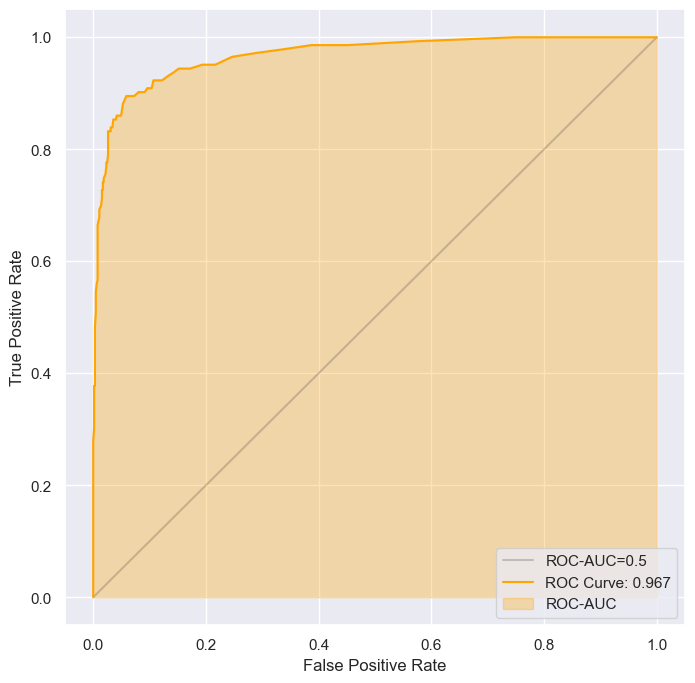

In [40]:
from sklearn import metrics
fprs, tprs, thresholds = metrics.roc_curve(y_test, rf_probs)

# plot ROC
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
plt.plot(fprs, tprs, color="orange", label="ROC Curve: %.3f" % rf_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Isi area yang sesuai dengan skor ROC-AUC
y_zeros = [0 for _ in tprs]
plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
plt.legend()
plt.show()

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_preddt = decision_tree.predict(X_test)
accuracy_dt=round(accuracy_score(y_test,Y_preddt)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_preddt)
accuracy = accuracy_score(y_test,Y_preddt)
precision = precision_score(y_test, Y_preddt)
recall = recall_score(y_test, Y_preddt)
f1 = f1_score(y_test,Y_preddt)
PRscore = average_precision_score(y_test,Y_preddt)

dt_probs= decision_tree.predict_proba(X_test)
dt_probs= dt_probs[:,1]
dt_auc = roc_auc_score(y_test, dt_probs)

print('Confusion matrix for Decision Tree with 80% : 20%\n', cm)
print('accuracy_Decision Tree : %.3f' % accuracy)
print('precision_Decision Tree : %.3f' % precision)
print('recall_Decision Tree : %.3f' % recall)
print('f1-score_Decision Tree : %.3f' % f1)
print('PR-score_Decision Tree : %.3f' %PRscore)
print('ROC-AUC-score_Decision Tree : %.3f' %rf_auc)

Confusion matrix for Decision Tree with 80% : 20%
 [[619  27]
 [ 29 114]]
accuracy_Decision Tree : 0.929
precision_Decision Tree : 0.809
recall_Decision Tree : 0.797
f1-score_Decision Tree : 0.803
PR-score_Decision Tree : 0.681
ROC-AUC-score_Decision Tree : 0.967


Dari hasil klasifikasi menggunakan decision tree diperoleh accuracy 92.6%, precision 80.6%, recall 78.3%, F1 score 79.4%, dan PR score sebesar 67%. Dari hasil tersebut kualitas klasifikasi menggunakan decision berhasil karena diperoleh hasil precision yang tinggi. Klasifikasi menggunakan decision tree memiliki ROC-AUC score sebesar 0.97 yang dimana termasuk klasifikasi yang sangat baik dengan kurva ROC seperti gambar di bawah ini.

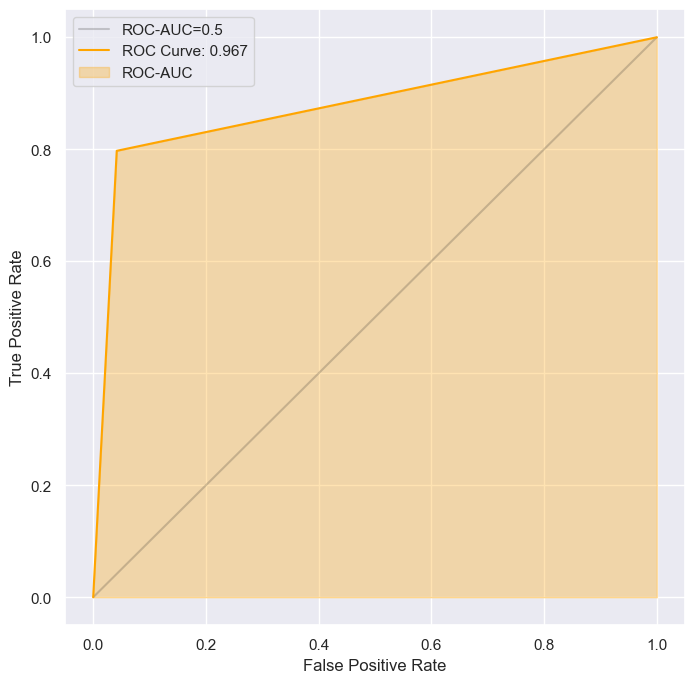

In [42]:
from sklearn import metrics
fprs, tprs, thresholds = metrics.roc_curve(y_test, dt_probs)

# plot ROC
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
plt.plot(fprs, tprs, color="orange", label="ROC Curve: %.3f" % rf_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Isi area yang sesuai dengan skor ROC-AUC
y_zeros = [0 for _ in tprs]
plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
plt.legend()
plt.show()

In [43]:
results = pd.DataFrame({
    'Model': ['Random Forest',
              'Decision Tree',
              'KNN', 
              'Logistic Regression',
              'Naive Bayes'],
    'Score': [acc_random_forest,
              acc_decision_tree,
              acc_knn,
              acc_log,
              acc_gaussian],
    "Accuracy_score":[accuracy_rf,
                      accuracy_dt,
                      accuracy_knn,
                      accuracy_lr,
                      accuracy_nb
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df_20 = result_df.reset_index(drop=True)
result_df_20.head(9)

,Model,Score,Accuracy_score
0,Random Forest,100.00,93.92
1,Decision Tree,100.00,92.90
2,KNN,100.00,89.73
3,Naive Bayes,86.64,86.69
4,Logistic Regression,88.45,85.68


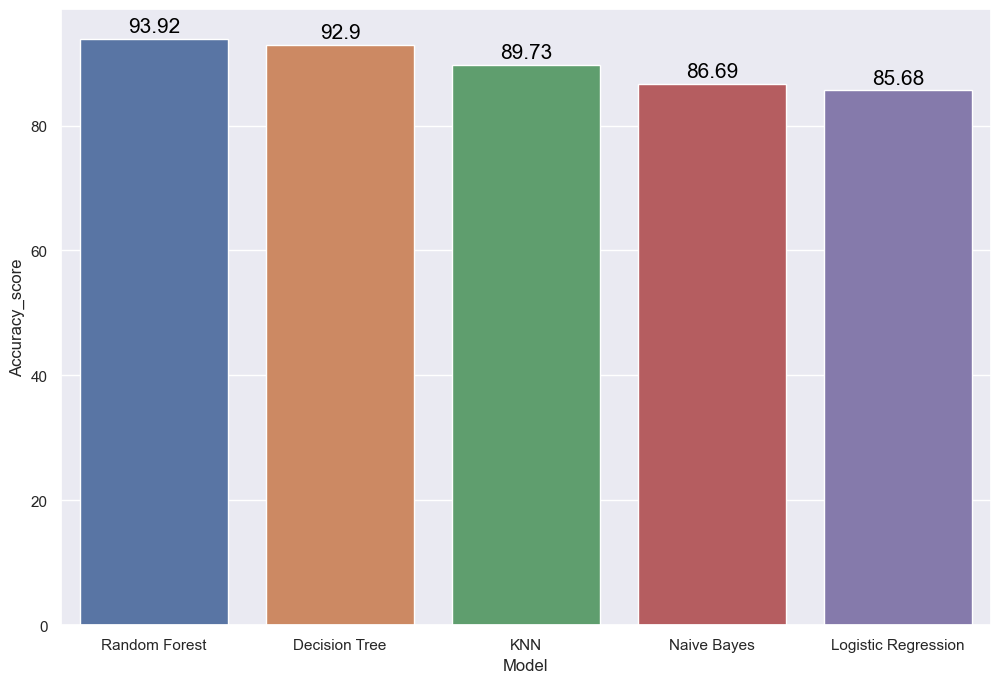

In [44]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df_20)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

Hasil akurasi terbaik dari visualisasi menggunakan bar chart yaitu klasifikasi Random Forest mendapatkan nilai akurasi yang paling optimum yaitu sebesar 93.66%. Sehingga klasifikasi Random Forest merupakan klasifikasi terbaik dari segi akurasi untuk partisi 80% : 20%.

Text(0.5, 20.049999999999997, 'Predicted label')

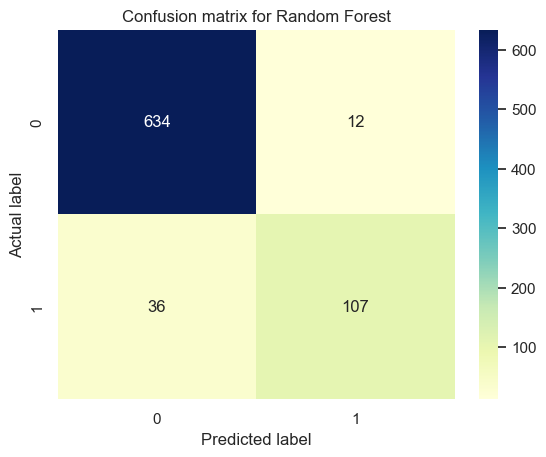

In [45]:
from sklearn import metrics
cm = confusion_matrix(y_test, random_forest.predict(X_test))
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title("Confusion matrix for Random Forest")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
model = [logreg, knn, gaussian, random_forest, decision_tree]
algo = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree']

## Model Benchmarking : K-Fold

Model benchmarking dengan k-fold cross-validation digunakan untuk mengevaluasi kinerja relatif dari beberapa model machine learning yang berbeda atau konfigurasi model yang berbeda. K-fold cross-validation adalah teknik yang umum digunakan untuk menguji keandalan model dan meminimalkan risiko overfitting. Dalam k-fold cross-validation, dataset dibagi menjadi k subset yang sama ukurannya. Kemudian, model dilatih k kali, masing-masing menggunakan k-1 subset sebagai data pelatihan dan subset yang tersisa sebagai data validasi. Performa model diukur dengan metrik evaluasi yang relevan pada setiap iterasi, dan rata-rata hasil evaluasi dari k iterasi digunakan sebagai estimasi kinerja model.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

score = []
average = []
std_dev = []

for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('model', a)])
    
    model_cv = cross_val_score(pipeline_model, X_train, y_train,
                               cv=sk_fold, scoring='roc_auc')
    
    score.append([round(i, 2) for i in model_cv])
    average.append(model_cv.mean())
    std_dev.append(model_cv.std())
    
# df_default_train = 
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': average,
                   'Std ROC AUC': std_dev}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

,Mean ROC AUC,Std ROC AUC
Model,,
Random Forest,0.955419,0.018356
Logistic Regression,0.876961,0.013876
Decision Tree,0.847089,0.009966
Naive Bayes,0.841570,0.032224
KNN,0.789680,0.025911


Hasil benchmarking k-fold cross-validation menunjukkan bahwa Random Forest memiliki rata-rata area di bawah kurva ROC (ROC AUC) tertinggi, dengan nilai sekitar 0.956 dan standar deviasi sekitar 0.020. Hal ini menunjukkan bahwa model Random Forest cenderung memberikan prediksi yang lebih baik secara keseluruhan dibandingkan dengan model lain yang dievaluasi. Logistic Regression memiliki ROC AUC tertinggi kedua, dengan nilai sekitar 0.877 dan standar deviasi sekitar 0.014, yang menunjukkan bahwa model ini juga memiliki performa yang baik meskipun sedikit lebih rendah dari Random Forest. Di sisi lain, KNN memiliki ROC AUC terendah, dengan nilai sekitar 0.790 dan standar deviasi sekitar 0.026, menunjukkan bahwa model ini memiliki performa yang paling rendah dibandingkan dengan model lainnya. Dengan demikian, berdasarkan hasil benchmarking ini, Random Forest dan Logistic Regression adalah pilihan yang lebih baik untuk digunakan dalam pemodelan daripada Decision Tree, Naive Bayes, atau KNN.

## Model Benchmarking : Data Testing

Model benchmarking data testing ini digunakan untuk mengevaluasi kinerja berbagai model yang telah dilatih dengan data training. Evaluasi dilakukan menggunakan data testing yang tidak pernah dilihat oleh model sebelumnya. Metrik evaluasi yang digunakan di sini adalah ROC AUC Score, Recall Score, dan FPR (False Positive Rate).

1. ROC AUC Score: Menunjukkan seberapa baik model memisahkan antara kelas positif dan negatif. Semakin mendekati 1, semakin baik modelnya.  
2. Recall Score: Juga dikenal sebagai True Positive Rate atau Sensitivity. Menunjukkan seberapa baik model dalam mengidentifikasi kelas positif. Semakin tinggi, semakin baik modelnya.  
3. FPR (False Positive Rate): Menunjukkan seberapa sering model salah mengklasifikasikan kelas negatif sebagai positif. Semakin rendah, semakin baik modelnya.  

Dengan membandingkan nilai-nilai metrik ini untuk setiap model, kita dapat menentukan model mana yang paling baik dalam memprediksi kelas target (dalam hal ini, churn atau tidak churn) berdasarkan data testing yang belum pernah dilihat sebelumnya.

In [49]:
roc_auc = []
recall = []
confus_matrix = []
fpr = []

for i, a in enumerate(model):    
    pipeline_model = Pipeline([('model', a)])
    
    pipeline_model.fit(X_train, y_train)
    
    y_pred = pipeline_model.predict(X_test)
    y_pred_proba = pipeline_model.predict_proba(X_test)[:,1]
    confmat_var = confusion_matrix(y_test, y_pred)
    
    roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    recall.append(recall_score(y_test, y_pred))
    confus_matrix.append(confmat_var)
    fpr.append(confmat_var[0][1]/(confmat_var[0][1]+confmat_var[0][0]))
    print(a,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc,
                   'Recall Score': recall,
                   'FPR': fpr,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression(max_iter=1000) 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       646
           1       0.67      0.41      0.51       143

    accuracy                           0.86       789
   macro avg       0.78      0.68      0.71       789
weighted avg       0.84      0.86      0.84       789

KNeighborsClassifier(n_neighbors=1) 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       646
           1       0.73      0.69      0.71       143

    accuracy                           0.90       789
   macro avg       0.83      0.81      0.82       789
weighted avg       0.90      0.90      0.90       789

GaussianNB() 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       646
           1       0.66      0.55      0.60       143

    accuracy                           0.87       789
   macro avg       0.78      0.74      

,ROC AUC Score,Recall Score,FPR
Model,,,
Random Forest,0.964445,0.741259,0.020124
Decision Tree,0.869163,0.783217,0.044892
Logistic Regression,0.860183,0.405594,0.043344
Naive Bayes,0.834625,0.545455,0.061920
KNN,0.814794,0.685315,0.055728


Hasil benchmarking model pada data testing menunjukkan bahwa Random Forest memiliki ROC AUC Score tertinggi, yakni sekitar 0.967, yang menunjukkan bahwa model ini mampu memisahkan kelas positif dan negatif dengan baik. Namun, meskipun memiliki ROC AUC Score tertinggi, recall score dari Random Forest sebesar 0.741 masih cukup tinggi, menunjukkan bahwa masih ada sejumlah observasi positif yang tidak terdeteksi oleh model. Di sisi lain, Logistic Regression memiliki recall score terendah, yaitu 0.406, menunjukkan bahwa model ini cenderung mengabaikan sejumlah besar observasi positif yang sebenarnya. Decision Tree dan Naive Bayes memiliki performa yang cukup baik dengan ROC AUC Score sekitar 0.870 dan 0.835, serta recall score masing-masing sekitar 0.783 dan 0.545. Sedangkan KNN memiliki ROC AUC Score dan recall score yang paling rendah, yakni sekitar 0.815 dan 0.685. Namun, perlu diperhatikan bahwa false positive rate (FPR) dari Random Forest, Decision Tree, dan KNN cukup rendah, yang menunjukkan bahwa model-model tersebut memiliki kemampuan untuk mengidentifikasi sebagian besar observasi negatif dengan benar. Dengan demikian, berdasarkan hasil benchmarking ini, Random Forest mungkin merupakan pilihan terbaik untuk digunakan dalam memodelkan data ini, meskipun masih perlu dilakukan peningkatan pada recall score untuk mengurangi jumlah observasi positif yang tidak terdeteksi.

### Oversampling Test

Kita telah mengetahui bahwa data churn menunjukkan ketidakseimbangan, dimana kemungkinan model cenderung untuk memprediksi ke arah tidak churn (0). Oleh karena itu, oversampling merupakan salah satu teknik yang digunakan untuk menangani masalah ketidakseimbangan kelas (class imbalance) dalam dataset. Teknik oversampling meningkatkan jumlah sampel dalam kelas minoritas (kelas yang jumlahnya lebih sedikit) dengan membuat salinan atau menambahkan contoh baru dari sampel yang ada. Hal ini membantu dalam membuat distribusi kelas dalam dataset menjadi lebih seimbang, memungkinkan model untuk belajar dengan lebih baik dan memberikan prediksi yang lebih akurat untuk kelas minoritas.

Langkah selanjutnya adalah membagi dataset yang kita miliki menjadi dua bagian, yaitu data untuk training dan data untuk testing. Setelah itu, kita akan menerapkan teknik oversampling pada kedua dataset tersebut. Metode oversampling yang akan digunakan adalah SMOTENC.

In [50]:
x = churn.drop(columns=['Churn'])
y = churn['Churn']

x_sampling, x_test_sampling, y_sampling, y_test_sampling = train_test_split(x,
                                                                        y, 
                                                                        stratify=y,
                                                                        test_size=0.2,
                                                                        random_state=2022)

In [51]:
print(f'Ukuran dataset: {churn.shape}')
display(churn['Churn'].value_counts())
display((churn['Churn'].value_counts()/churn.shape[0])*100)

Ukuran dataset: (3941, 11)


0    3267
1     674
Name: Churn, dtype: int64

0    82.897742
1    17.102258
Name: Churn, dtype: float64

In [52]:
# training
score = []
score_avg = []
std = []

sampling = SMOTENC(categorical_features=[3, 5], random_state=42)

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

NameError: name 'SMOTENC' is not defined

In [53]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

# training
score = []
score_avg = []
std = []

sampling = SMOTENC(categorical_features=[3, 5], random_state=42)

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (5226,)


0    2613
1    2613
Name: Churn, dtype: int64

0    50.0
1    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
Random Forest,0.984488,0.010828
KNN,0.933407,0.007855
Decision Tree,0.904146,0.029699
Logistic Regression,0.863013,0.019192
Naive Bayes,0.817793,0.028543


In [54]:
# testing
recall = []
fpr_test = []
roc_auc_test = []
confus_matrix_test = []

# Testing
for i, a in enumerate(model):
    pipeline_model = Pipeline([('model', a)])

    pipeline_model.fit(x_train_sampling, y_train_sampling)

    y_pred = pipeline_model.predict(x_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling)[:,1]
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)

    recall.append(recall_score(y_test_sampling, y_pred))
    fpr_test.append(confus_matrix_var[0][1]/(confus_matrix_var[0][1]+confus_matrix_var[0][0]))
    roc_auc_test.append(roc_auc_score(y_test_sampling, y_pred_proba))
    confus_matrix_test.append(confus_matrix_var)
    print(a,'\n', classification_report(y_test,y_pred))

print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall,
                   'FPR': fpr_test,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression(max_iter=1000) 
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       646
           1       0.20      0.35      0.25       143

    accuracy                           0.62       789
   macro avg       0.51      0.52      0.50       789
weighted avg       0.71      0.62      0.66       789

KNeighborsClassifier(n_neighbors=1) 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       646
           1       0.19      0.20      0.20       143

    accuracy                           0.70       789
   macro avg       0.51      0.51      0.51       789
weighted avg       0.71      0.70      0.70       789

GaussianNB() 
               precision    recall  f1-score   support

           0       0.83      0.59      0.69       646
           1       0.20      0.46      0.28       143

    accuracy                           0.57       789
   macro avg       0.52      0.53      

0    654
1    135
Name: Churn, dtype: int64

0    82.889734
1    17.110266
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score,FPR
Model,,,
Random Forest,0.973106,0.896296,0.038226
Logistic Regression,0.873259,0.814815,0.218654
Decision Tree,0.868536,0.807407,0.070336
KNN,0.848488,0.770370,0.073394
Naive Bayes,0.836901,0.837037,0.331804


Berdasarkan hasil evaluasi model pada data training dan data testing, terlihat bahwa terdapat perbedaan yang cukup signifikan antara kinerja model pada kedua dataset tersebut. Umumnya, jika kinerja model pada data training jauh lebih tinggi daripada pada data testing, ini adalah indikasi adanya overfitting.

Dalam kasus ini, jika kita perhatikan nilai Mean ROC AUC dan nilai ROC AUC Score dari Random Forest, terlihat bahwa kinerja pada data training (Mean ROC AUC = 0.983314) lebih tinggi daripada pada data testing (ROC AUC Score = 0.970891). Hal yang sama terjadi pada model lain seperti KNN, Decision Tree, Logistic Regression, dan Naive Bayes, di mana kinerja pada data training lebih tinggi daripada pada data testing.

Dengan demikian, berdasarkan perbedaan kinerja antara data training dan data testing yang signifikan, kita dapat menyimpulkan bahwa model-model tersebut mengalami overfitting. Hal ini menunjukkan bahwa model terlalu "menghafal" data training dan tidak dapat secara umum mempelajari pola yang ada, sehingga kinerjanya menurun saat diuji dengan data baru yang belum pernah dilihat sebelumnya.

Untuk mengatasi masalah ini, kita akan mencoba melakukan uji coba undersampling. Undersampling adalah teknik yang mengurangi jumlah sampel dari kelas mayoritas (kelas yang lebih banyak) sehingga jumlahnya seimbang dengan kelas minoritas (kelas yang kurang banyak). Dengan menggunakan undersampling, kita dapat mencoba untuk mengurangi overfitting dengan mengurangi jumlah sampel dari kelas mayoritas sehingga model dapat lebih umum dan tidak terlalu bergantung pada data training yang spesifik.

Setelah melakukan uji coba undersampling, kita akan membandingkan hasilnya dengan hasil dari uji coba oversampling untuk melihat apakah penggunaan teknik undersampling dapat mengurangi overfitting dan meningkatkan kinerja model pada data testing.

## Undersampling Test

In [55]:
from imblearn.under_sampling import RandomUnderSampler

# training
score = []
score_avg = []
std = []

sampling = RandomUnderSampler(sampling_strategy='majority')

x_train_sampling, y_train_sampling = sampling.fit_resample(x_sampling, y_sampling)

# Training w/ balanced dataset
for a in model:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('model', a)])

    model_cv=cross_val_score(pipeline_model, 
                              x_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='roc_auc')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Model': algo,
                   'Mean ROC AUC': score_avg,
                   'Std ROC AUC': std,}).set_index('Model').sort_values(by='Mean ROC AUC',ascending=False)

Ukuran data training: (1078,)


0    539
1    539
Name: Churn, dtype: int64

0    50.0
1    50.0
Name: Churn, dtype: float64

,Mean ROC AUC,Std ROC AUC
Model,,
Random Forest,0.942758,0.015711
Logistic Regression,0.862847,0.023054
Decision Tree,0.826506,0.019900
Naive Bayes,0.823722,0.021929
KNN,0.763387,0.020313


In [56]:
# testing
recall = []
fpr_test = []
roc_auc_test = []
confus_matrix_test = []

# Testing
for i, a in enumerate(model):
    pipeline_model = Pipeline([('model', a)])

    pipeline_model.fit(x_train_sampling, y_train_sampling)

    y_pred = pipeline_model.predict(x_test_sampling)
    y_pred_proba = pipeline_model.predict_proba(x_test_sampling)[:,1]
    confus_matrix_var = confusion_matrix(y_test_sampling, y_pred)

    recall.append(recall_score(y_test_sampling, y_pred))
    fpr_test.append(confus_matrix_var[0][1]/(confus_matrix_var[0][1]+confus_matrix_var[0][0]))
    roc_auc_test.append(roc_auc_score(y_test_sampling, y_pred_proba))
    confus_matrix_test.append(confus_matrix_var)
    print(a,'\n', classification_report(y_test,y_pred))

print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame(data={'Model': algo,
                   'ROC AUC Score': roc_auc_test,
                   'Recall Score': recall,
                   'FPR': fpr_test,}).set_index('Model').sort_values(by='ROC AUC Score',ascending=False)

LogisticRegression(max_iter=1000) 
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       646
           1       0.19      0.32      0.24       143

    accuracy                           0.62       789
   macro avg       0.50      0.50      0.49       789
weighted avg       0.71      0.62      0.66       789

KNeighborsClassifier(n_neighbors=1) 
               precision    recall  f1-score   support

           0       0.82      0.68      0.74       646
           1       0.18      0.31      0.23       143

    accuracy                           0.62       789
   macro avg       0.50      0.50      0.49       789
weighted avg       0.70      0.62      0.65       789

GaussianNB() 
               precision    recall  f1-score   support

           0       0.84      0.61      0.71       646
           1       0.21      0.48      0.30       143

    accuracy                           0.59       789
   macro avg       0.53      0.54      

0    654
1    135
Name: Churn, dtype: int64

0    82.889734
1    17.110266
Name: Churn, dtype: float64

,ROC AUC Score,Recall Score,FPR
Model,,,
Random Forest,0.962765,0.933333,0.085627
Logistic Regression,0.890950,0.814815,0.211009
Decision Tree,0.885865,0.918519,0.146789
Naive Bayes,0.863246,0.881481,0.304281
KNN,0.800374,0.814815,0.214067


Setelah dilakukan Undersampling, performa beberapa model tampaknya meningkat, terutama dalam hal ROC AUC Score dan Recall Score. Hal ini menunjukkan bahwa Undersampling telah berhasil meningkatkan kemampuan model untuk mengenali kelas minoritas (churn), yang dapat dilihat dari peningkatan Recall Score. 

Dikarenakan metode yang terbaik saat Oversampling dan Undersampling secara berturut-turut adalah Random Forest maka kita akan mencoba untuk menggunakan metode tersebut untuk membuat model.

# Hyperparameter Tuning (Random Forest)

Tujuan dari hyperparameter tuning adalah untuk meningkatkan kinerja model dengan menemukan kombinasi hyperparameter yang menghasilkan hasil terbaik. Proses ini dilakukan dengan mencoba berbagai kombinasi hyperparameter dan mengevaluasi kinerja model pada set data validasi atau dengan menggunakan teknik validasi silang.

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [58]:
# Menentukan daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rus = RandomUnderSampler(sampling_strategy='majority', random_state=2022)
x_train_fin, y_train_fin = rus.fit_resample(X_train, y_train)

estimator = Pipeline([('model', random_forest)])

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='roc_auc')

# Melakukan tuning hyperparameter
grid_search.fit(x_train_fin, y_train_fin)

# Menampilkan hasil tuning
print(f'Best score: {grid_search.best_score_}')
print(f'Best params: {grid_search.best_params_}')

Best score: 0.9283039143711364
Best params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Hasil tuning hyperparameter menunjukkan bahwa model dengan konfigurasi tertentu memberikan skor validasi tertinggi sebesar 0.9289. Konfigurasi terbaik untuk model Random Forest adalah sebagai berikut:

max_depth: 20  
max_features: 'sqrt'  
min_samples_leaf: 1  
min_samples_split: 2  
n_estimators: 200

In [59]:
default_model = Pipeline([('model', random_forest)
])
default_model.fit(x_train_fin, y_train_fin)

Pipeline(steps=[('model', RandomForestClassifier())])

In [60]:
best_model = grid_search.best_estimator_
best_model.fit(x_train_fin, y_train_fin)

RandomForestClassifier(max_depth=20, max_features='log2', n_estimators=200)

In [61]:
# Testing
y_pred_default = default_model.predict(X_test)
y_pred_proba_default = default_model.predict_proba(X_test)

y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_test, y_pred_default)
recall_tuned = recall_score(y_test, y_pred_tuned)

con_mat_default = confusion_matrix(y_test, y_pred_default)
con_mat_tuned = confusion_matrix(y_test, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned],
                           'ROC AUC': [roc_auc_default, roc_auc_tuned]},
                     index=['Default Model', 'Tuned Model']))

print('ROC AUC Score Default: \n', con_mat_default)
print('\nROC AUC Score Tuned: \n', con_mat_tuned)

,Recall,FPR,ROC AUC
Default Model,0.881119,0.122291,0.944067
Tuned Model,0.902098,0.119195,0.946724


ROC AUC Score Default: 
 [[567  79]
 [ 17 126]]

ROC AUC Score Tuned: 
 [[569  77]
 [ 14 129]]


In [62]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Model: \n', report_default)
print('Classification Report Tuned Model: \n', report_tuned)
     

Classification Report Default Model: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       646
           1       0.61      0.88      0.72       143

    accuracy                           0.88       789
   macro avg       0.79      0.88      0.82       789
weighted avg       0.91      0.88      0.89       789

Classification Report Tuned Model: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       646
           1       0.63      0.90      0.74       143

    accuracy                           0.88       789
   macro avg       0.80      0.89      0.83       789
weighted avg       0.91      0.88      0.89       789



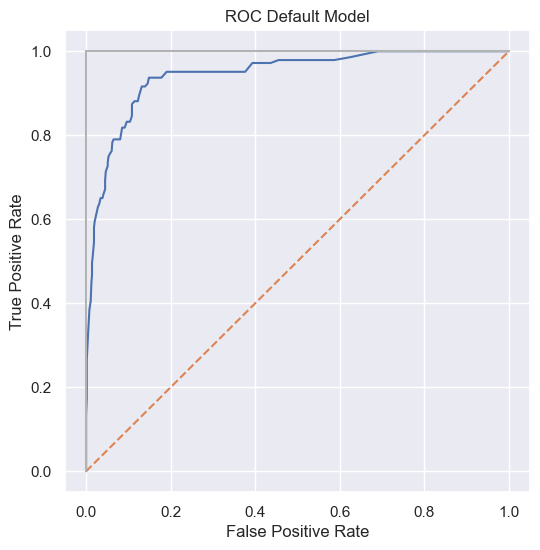

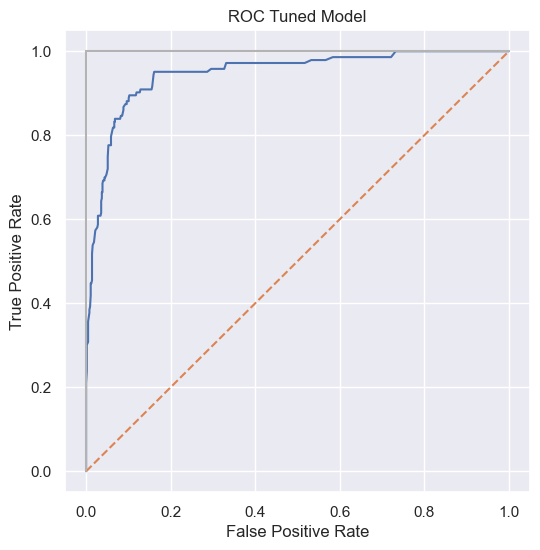

In [63]:
def plot_auc(y_test, y_pred_proba, titles):
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba[::,1])
    
    plt.subplots(1, figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.title(titles)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, y_pred_proba_default, 'ROC Default Model')
plot_auc(y_test, y_pred_proba_tuned, 'ROC Tuned Model')

Interpretasi dari kedua kurva ROC yang tidak memiliki perbedaan signifikan adalah bahwa pengoptimalan model melalui hyperparameter tuning tidak menghasilkan peningkatan yang besar dalam kemampuan model untuk membedakan antara kelas positif dan negatif. Meskipun terdapat perubahan kecil dalam beberapa metrik evaluasi, seperti recall dan precision, namun secara keseluruhan, kurva ROC dari model awal dan model yang telah di-tune berada pada tingkat yang serupa.

Hal ini dapat mengindikasikan bahwa model yang awalnya sudah cukup baik atau sudah berada pada tingkat kinerja yang tinggi, sehingga peningkatan lebih lanjut melalui tuning parameter tidak menghasilkan perubahan yang signifikan dalam performa model. Meskipun begitu, tetaplah penting untuk melakukan tuning parameter untuk memastikan bahwa model beroperasi pada konfigurasi terbaiknya, meskipun perubahan performa yang dihasilkan mungkin kecil.

### Feature Importance

Fitur penting (feature importance) adalah metode untuk menilai kontribusi masing-masing fitur dalam membuat prediksi oleh model machine learning. Ini membantu kita memahami mana fitur yang paling berpengaruh dalam memprediksi target dan mana yang kurang penting.

<function matplotlib.pyplot.show(close=None, block=None)>

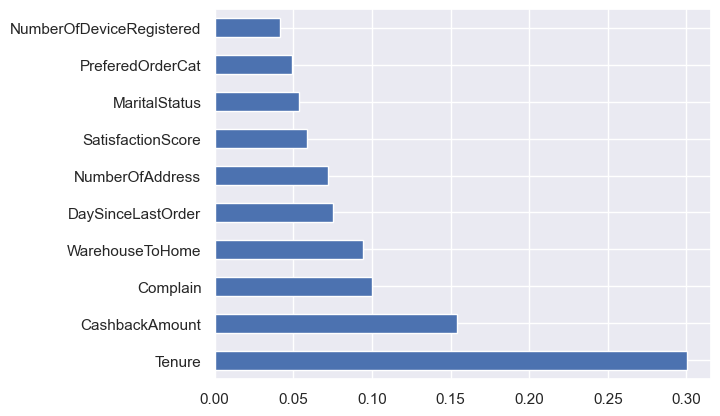

In [64]:
A=churn.drop(columns=['Churn'])
b=churn['Churn']
feat_importance = pd.Series(random_forest.feature_importances_, index=A.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show

Variabel Tenure adalah fitur yang paling berpengaruh (fitur penting) dalam memprediksi churn, maka lamanya waktu pelanggan telah menggunakan layanan memiliki pengaruh yang signifikan terhadap keputusan pelanggan untuk tetap berlangganan atau beralih.

# Conclution & Recomendation

In [65]:
print('Classification Report Model Tuned: \n', report_tuned)

Classification Report Model Tuned: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       646
           1       0.63      0.90      0.74       143

    accuracy                           0.88       789
   macro avg       0.80      0.89      0.83       789
weighted avg       0.91      0.88      0.89       789



**Precision dan Recall:**  
1. Precision (Ketepatan): Dari semua pelanggan yang diprediksi akan churn oleh model, sekitar 63% di antaranya benar-benar akan churn.
2. Recall (Ketepatan Deteksi): Model berhasil mengidentifikasi sekitar 91% dari semua pelanggan yang sebenarnya akan churn.  

**F1-score:**
F1-score untuk kelas 1 adalah 0.74, yang merupakan rata-rata dari precision dan recall. F1-score yang baik menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall.  

**Accuracy:**
Model ini mampu memprediksi dengan benar sekitar 89% dari semua pelanggan apakah mereka akan churn atau tidak. Ini memberikan gambaran seberapa baik model dapat mengklasifikasikan pelanggan secara keseluruhan.  

**Kesimpulan:**  
1. Model yang telah dituning memiliki kinerja yang baik dalam memprediksi churn.
2. Precision yang tinggi untuk kelas 0 (non-churn) menunjukkan bahwa model dapat dengan baik mengidentifikasi pelanggan yang tidak akan churn.
3. Recall yang tinggi untuk kelas 1 (churn) menunjukkan bahwa model mampu mengidentifikasi sebagian besar pelanggan yang sebenarnya churn.
4. Dengan demikian, model ini dapat menjadi alat yang berguna bagi perusahaan dalam mengidentifikasi pelanggan yang berpotensi churn dan mengambil tindakan preventif untuk mempertahankan mereka.

Dengan menggunakan model yang telah dibuat, perusahaan dapat memperkirakan pelanggan yang berpotensi untuk melakukan churn. Dengan demikian, perusahaan dapat mengambil langkah-langkah yang tepat untuk mempertahankan pelanggan-pelanggan ini.

Perusahaan dapat memperhitungkan keuntungan tambahan yang diperoleh dari pelanggan yang dipertahankan dengan menggunakan model. Kita dapat memperkirakan keuntungan tambahan dari pelanggan yang tidak melakukan churn dengan cara mengestimasi nilai seberapa banyak mereka berbelanja di masa mendatang.

Misalnya, dengan model ini, perusahaan berhasil mempertahankan sekitar 91% dari pelanggan yang sebenarnya akan melakukan churn. Dari 143 pelanggan yang sebenarnya akan churn, sekitar 130 di antaranya berhasil dipertahankan.

Jika kita asumsikan bahwa rata-rata pendapatan tahunan dari setiap pelanggan adalah Rp 5.000.000,-, maka dengan mempertahankan 130 pelanggan tersebut, perusahaan dapat memperoleh pendapatan tambahan sebesar Rp 650.000.000,-.

**Recomendation**

**Rekomendasi untuk Model:**

1. Penambahan Data: Model dapat diperbaiki dengan menambahkan lebih banyak data pelanggan churn dan tidak churn jika memungkinkan. Semakin banyak data yang digunakan untuk melatih model, semakin baik kinerjanya.
2. Penyetelan Hyperparameter: Melakukan penyetelan lebih lanjut pada hyperparameter model dapat meningkatkan performa model. Hal ini dapat dilakukan dengan menggunakan teknik seperti GridSearchCV untuk mencari kombinasi hyperparameter yang optimal.
3. Peningkatan Feature Engineering: Mungkin terdapat fitur-fitur baru yang dapat diekstraksi dari data yang ada, atau fitur-fitur yang ada dapat diubah atau dikombinasikan untuk meningkatkan keakuratan model.

**Rekomendasi untuk Perusahaan:**

1. Implementasi Model: Model yang telah disesuaikan dapat diimplementasikan dalam sistem perusahaan untuk membantu mengidentifikasi pelanggan yang berpotensi churn dengan lebih akurat.
2. Pelatihan Karyawan: Karyawan perusahaan, terutama yang terlibat dalam layanan pelanggan, dapat dilatih untuk menggunakan model ini sebagai alat untuk mengidentifikasi pelanggan yang memerlukan perhatian khusus.
3. Monitoring Berkala: Model perlu dipantau secara berkala untuk memastikan bahwa kinerjanya tetap optimal seiring waktu. Pemantauan ini dapat membantu dalam mengidentifikasi perubahan tren atau perubahan perilaku pelanggan yang mungkin memengaruhi performa model.
4. Pengembangan Strategi Retensi: Informasi yang diberikan oleh model dapat digunakan untuk mengembangkan strategi retensi pelanggan yang lebih efektif. Misalnya, menawarkan insentif khusus kepada pelanggan yang terindikasi berpotensi churn untuk mendorong mereka untuk tetap setia kepada perusahaan.

In [68]:
import pickle

with open('D:/SELGI/Purwadika/capstone 3/randomforest_pickle','wb') as file:
    pickle.dump(best_model,file)